# <h1><center>Where Does the Aid Go?</center></h1>
## <h2><center>An Exploration of USAIDs Foreign Assistance Funding</center></h2>

## Table of Contents
1. [Introduction](#introduction)
2. [Literature Review](#lit_review)
3. [Research Question](#rq)
4. [Data Description](#data_descrp)
5. [Data Validation and Cleaning](#data_clean)
    1. [USAID Data](#USAID_intro)
    2. [Country Indicators Data](#country_indicators)
    3. [United Nations Data](#UNData)
    4. [Happiness Index Data](#happy_data)
    5. [Merging Data](#data_merge)
6. [Data Pre-Processing and Exploration](#data_explore)
7. [Data Exploration - Clustering](#clustering)
    1. [DBSCAN](#DBSCAN)
    2. [K-means](#Kmeans)
8. [Primary Analysis - Classification](#classification)
    1. [Standardisation, Feature Selection, and Data Reorganisation](#PCA)
    2. [k-NN](#kNN)
    3. [Support Vector Machine](#SVM)
    4. [Random Forest](#RF)
9. [Results and Conclusions](#results)    
10. [References](#ref) 
    

## Introduction <a name="introduction"></a>

Following World War II the United States took a prominent role in foreign assistance efforts around the globe. Initially, international development assistance was in the form of financial and technical aid to European countries. Through the 1950's the process evolved into a foreign policy tool for the government. The United States attempted to diminish the threat of communism by promoting capitalism and create overseas markets by reducing poverty and increasing production in developing countries (USAID, 2018).

In 1961, the United States established the United States Agency for International Development (USAID). This led to a change in foreign assistance. The aid shifted from capital and technical assistance programs to programs focused on basic human needs - such as nutrition, health, and education.

USAID has prioritized different development approaches over the decades, and today their main objective "is to support partners to become self-reliant and capable of leading their own development journeys" (USAID, 2018). USAID balances a dual role of being a government policy tool promoting democracy and capitalist markets, while also providing assistance to help struggling countries with their own development.

This paper seeks to explore this relationship. We will investigate where USAID provides foreign assistance funding and how much of the funding relates to the development indicators of these countries.


## Literature Review <a name="lit_review"></a>

A brief literature review was conducted to guide our research. We are most interested in previous studies that explored the relationship between aid for development versus foreign policy.

Tomohisa Hattori explored foreign assistance as a moral practice and concluded that some foreign assistance, particularly grants by aid agencies, goes beyond the simple notion of reciprocity and is truly a contemporary form of benevolence (2003). A more recent study by Tobias Heinrich researched models to predict when foreign assistance was identified as selfless versus selfish (2013). He concluded that donor countries with greater awareness of the poverty-stricken recipient leads to selfless aid. Each of these studies lend support to our investigation as we would expect USAID, the development agency of a world hegemon, to provide foreign assistance to improve the well-being of populations without an expectation of explicit reciprocity through selfless giving.

Our study is also inspired by a similar, political science investigation. McKinlay and Little developed a foreign policy model to explain the United States' bilateral aid allocation, attempting to explain if aid allocation is explained by the humanitarian need of the recipient or the foreign policy interest of the donor (1977). Their model concluded that the best explanation of aid allocation was related to imperialism, and thus, foreign policy interests. We will expand greatly on their methodology. McKinlay and Little only used a handful of economic indicators in their model - we will use a large variety of economic, social, and environmental indicators. Further, their study was conducted in 1977 and we will use present-day information. 

Our analysis technique is guided and adapted from the World Bank's famous country classifications based on income. The World Bank classifies countries into income groups based on gross national income per capita (Fantom and Serajuddin, 2016). We will use a similar approach and classify countries based on the amount of obligated aid received.


## Research Question <a name="rq"></a>

This study will investigate the relationship between the amount of USAID funding countries receive and their development indicators. We will attempt to answer the following question:

* Can we predict the amount of aid countries receive based on their country development profiles?
    
Based on USAIDs principles, we would expect that countries with similar economic, social, and infrastructure indicators would receive a similar amount in funding. This would suggest aid based on need. However, based on USAIDs additional role of being a foreign policy instrument, it is possible that the amount of aid that countries receive is not equivalent to their need. In this case, we would have difficulty predicting the amount of aid a country receives based solely on their development indicators.


## Data Description <a name="data_descrp"></a>

Our study will use data from multiple sources and combine them into a robust dataset for investigation. All data is open source.

The first, and by far the largest, dataset comes from USAID itself. USAID maintains an official record of all U.S. foreign aid on their foreign aid explorer website (FAE, 2019). The full dataset has been downloaded and will be explored in the following section.

The second dataset comes from Joni Hoppen, who compiled a dataset of 65 world indexes and indicators for 188 countries and shared through kaggle.com (Hoppen, 2017). While substantial, this dataset has many old values and some of the categories are unclear. We will only use a fraction of the categories from this data. Index categories, such as the Gini coefficient and consumer price index, are not present in our other datasets so we will take them from this dataset. 

Our third dataset comes from the United Nations Statistics Division (UNSD). Similar to USAID, the UN maintains a data service explorer. UNData combines more than 20 statistical sources compiled by UNSD and other international organisations (UNData, 2019). It is incredibly thorough and these statistics are the bulk of our analysis. 

The final dataset we include is the 2017 World Happiness Report. The World Happiness Report has been constructed every year since 2012 by the UN using Gallup World Poll survey data in 156 countries (WHR, 2019). The report reviews the state of happiness around the world and establishes an index for each country between 0 (unhappy) and 10 (happy). While the methodology and metrics of the report are contentious, it is a unique index we can include as a proxy for overall well-being for the countries we investigate.

## Data Validation and Cleaning <a name="data_clean"></a>

Before we begin our investigation into the foreign assistance amounts and other data attributes, we must import and clean our CSV data. In order to conduct proper analysis we must validate all of our data, ensure consistency with naming conventions (such as country names), and handle null values. We will import each dataset one at a time and perform these activities. Finally, we will merge them altogether into a single dataset. We will perform additional data munging activities on the merged data related to restructuring our data and create new categories. 

First, we will import the Python libraries we will use throughout our analysis.

In [1]:
# import libraries needed for workbook
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import  PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from io import StringIO
import re

# specify number of rows and columns to show
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 100)
# set default number format to 3 decimal places
pd.options.display.float_format = '{:40,.3f}'.format
# set ggplot style for plots
plt.style.use('ggplot') 
%matplotlib inline

C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### USAID Data <a name="USAID_intro"></a>

The first dataset we will import and clean is the USAID data from USAIDs Foreign Aid Explorer website. The complete dataset was downloaded as a CSV file and will be imported into Python as a Pandas dataframe. The dataset is quite large - 550 MB. We will significantly reduce the size of the data to fit our needs. 

First, we will import the data and view a sample of the rows to get a sense of the structure. 

In [2]:
# Import the USAID data CSV file and view the file
usaid_data = pd.read_csv('us_foreign_aid.csv')
usaid_data.sample(5)


C:\Users\Robert\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (38,39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,implementing_agency_id,implementing_agency_acronym,implementing_agency_name,implementing_subagency_id,subagency_acronym,subagency_name,channel_category_id,channel_category_name,channel_subcategory_id,channel_subcategory_name,channel_id,channel_name,dac_category_id,dac_category_name,dac_sector_code,dac_sector_name,dac_purpose_code,dac_purpose_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,assistance_category_id,assistance_category_name,aid_type_group_id,aid_type_group_name,activity_id,activity_name,activity_project_number,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,current_amount,constant_amount,USG_sector_id,USG_sector_name,submission_id
820019,646,RWA,Rwanda,5,Sub-Saharan Africa,1.000,Low Income Country,LIC,9,DOI,Department of the Interior,49,FWS,U.S. Fish and Wildlife Service,3.000,NGO,5.000,NGO - United States,4001137,Population Media Center,7,Other,410,General Environmental Protection,41030,Bio-diversity,14x1652,"U.S. Fish and Wildlife Service, Multinational ...",9,Department of the Interior,DOI,1,Economic,3,Project-Type,547417,Great Ape Conservation,NaN,NaN,NaN,2,Obligations,2008,50000,56206,35,Natural Resources and Biodiversity,38
947599,268,GEO,Georgia,2,Europe and Eurasia,3.000,Upper Middle Income Country,UMIC,3,MCC,Millennium Challenge Corporation,999,NaN,not applicable,1.000,Government,1.000,Government - United States,1000006,U.S. Government - Millennium Challenge Corpora...,1,Education,111,"Education, Level Unspecified",11120,Education facilities and training,95x2750,"Millennium Challenge Corporation, Expenses",3,Millennium Challenge Corporation,MCC,1,Economic,3,Project-Type,553444,MCC Education Project,GE2-2750BX69GD-EDU-394,NaN,NaN,2,Obligations,2014,-216223,-221383,48,Education and Social Services - General,40
516015,218,ECU,Ecuador,6,Western Hemisphere,3.000,Upper Middle Income Country,UMIC,1,USAID,U.S. Agency for International Development,26,LAC,Bureau for Latin America and Caribbean,1.000,Government,1.000,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,10,Administrative Costs,911,Operating Expenses,91010,Operating Expenses,72x8342,Foreign National Employees Separation Liabilit...,1,U.S. Agency for International Development,USAID,1,Economic,6,Administrative Costs,626142,Administrative costs,OE,NaN,NaN,3,Disbursements,2013,43,44,41,Direct Administrative Costs,76
289828,694,SLE,Sierra Leone,5,Sub-Saharan Africa,1.000,Low Income Country,LIC,1,USAID,U.S. Agency for International Development,25,GH,Bureau for Global Health,1.000,Government,1.000,Government - United States,1000004,U.S. Government - Department of State,2,Health and Population,122,Basic Health,12250,Infectious disease control,19x1031,"Department of State, Global Health Programs",2,Department of State,STATE,1,Economic,3,Project-Type,646442,Avian Influenza,3.1.4,NaN,NaN,2,Obligations,2017,65000,63828,14,Pandemic Influenza and Other Emerging Threats ...,76
766771,268,GEO,Georgia,2,Europe and Eurasia,3.000,Upper Middle Income Country,UMIC,5,AGR,Department of Agriculture,999,NaN,not applicable,1.000,Government,1.000,Government - United States,1000002,U.S. Government - Department of Agriculture,8,Commodity Assistance,520,Developmental Food Aid/Food Security Assistance,52010,Food aid/Food security programmes,12x4336,Commodity Credit Corporation Fund,5,Department of Agriculture,AGR,1,Economic,3,Project-Type,930490,Section 416(b) Food Aid - Commodity Value of A...,APH02304,NaN,NaN,2,Obligations,2001,112605,149996,37,"Protection, Assistance and Solutions",999


We can see from above that the data is structured by individual foreign assistance projects (rows) and 48 related categories (columns). These categories include the country name, region, income group, US implementing agency, project name, project start and end dates, fiscal year, and amount of aid obligated or disbursed for the project. 

Next, we will look at the counts of all these categories to gain a sense of the extent of the data. 

In [3]:
# Look at the records for all of the categories. 
usaid_data.count()

country_id                     950543
country_code                   950257
country_name                   950543
region_id                      950543
region_name                    950543
income_group_id                765594
income_group_name              765594
income_group_acronym           765594
implementing_agency_id         950543
implementing_agency_acronym    949844
implementing_agency_name       950543
implementing_subagency_id      950543
subagency_acronym              855631
subagency_name                 950543
channel_category_id            950539
channel_category_name          950539
channel_subcategory_id         950539
channel_subcategory_name       950539
channel_id                     950543
channel_name                   950539
dac_category_id                950543
dac_category_name              950543
dac_sector_code                950543
dac_sector_name                950543
dac_purpose_code               950543
dac_purpose_name               950543
funding_acco

This dataset contains an immense amount of records - over 950,000. However, we will remove many of the redundant categories and focus only on the information we want to take into our analysis.

To start with our cleaning, we will first check the data types to make sure we can clean effectively.


In [4]:
# Check the data types
usaid_data.dtypes

country_id                       int64
country_code                    object
country_name                    object
region_id                        int64
region_name                     object
income_group_id                float64
income_group_name               object
income_group_acronym            object
implementing_agency_id           int64
implementing_agency_acronym     object
implementing_agency_name        object
implementing_subagency_id        int64
subagency_acronym               object
subagency_name                  object
channel_category_id            float64
channel_category_name           object
channel_subcategory_id         float64
channel_subcategory_name        object
channel_id                       int64
channel_name                    object
dac_category_id                  int64
dac_category_name               object
dac_sector_code                  int64
dac_sector_name                 object
dac_purpose_code                 int64
dac_purpose_name         

The data is mostly what we expect - a mixture of strings and numbers throughout the dataset. One data type that is worth transforming is the fiscal_year value from an object to an integer as that is a category we will move using forward.

We do this by converting the fiscal_year column to from object to integer. If any data cannot be transformed, it will be converted to NaN in order to easily drop it. Any NaN fiscal_year data relates to cancelled projects and we can remove it. 

In [5]:
# Change fiscal year column to integer data type

# Convert to numeric data and anything not numeric to NaN
usaid_data["fiscal_year"] = pd.to_numeric(usaid_data["fiscal_year"], errors='coerce')

# Drop any NaN values from the dataset as they relate to cancelled projects
usaid_data = usaid_data.dropna(subset=['fiscal_year'])


# Finally, convert the column to "integer" type for better reading and parsing
usaid_data = usaid_data.astype({"fiscal_year": int})



With the fiscal_year converted to numeric data type, we can investigate the category. 

In [6]:
# Look at the fiscal_year values
usaid_data.fiscal_year.value_counts()

2010    64849
2017    63331
2009    62318
2011    62308
2012    60847
2008    57768
2016    55958
2013    55627
2015    54971
2014    54952
2007    49601
2005    46612
2006    46562
2004    37991
2003    36868
2002    33395
2001    28105
2018    27417
2000     4876
1999     3993
1998     3533
1995     3268
1996     3097
1994     3086
1993     2860
1997     2659
1992     2298
1991      944
1990      905
1963      639
1962      632
1989      623
1965      602
1964      595
1988      588
1985      586
1966      586
1987      579
1986      571
1967      564
1984      539
1975      539
1982      538
1968      535
1983      529
1974      525
1972      514
1973      513
1969      511
1981      498
1971      496
1980      494
1961      492
1977      487
1979      487
1976      483
1970      482
1978      477
1960      433
1959      420
1958      399
1957      380
1956      354
1955      304
1954      241
1952      203
1953      181
1951      142
1950      114
1947       85
1946       84
1949  

This dataset is quite extensive, with foreign aid data going all the way back to 1946.

We will drastically cut the size of our dataset because we do not need all those records. Our development indicator data is more recent, and for comparison's sake, we should use data from the same year. Thus, moving forward, we are only interested data from the most recent, complete fiscal year - 2017.

We can reduce our USAID dataset by keeping only data related to 2017. 

In [7]:
# Cut the datafame to only include data from fiscal year 2017
usaid_data = usaid_data.loc[usaid_data['fiscal_year'] == 2017]
print(usaid_data.fiscal_year.value_counts())

2017    63331
Name: fiscal_year, dtype: int64


By only focusing on one year we reduced our data from over 950,000 records to just over 63,000. Further, we are only interested in USAID foreign assistance funding. We can see that this dataset includes U.S. foreign assistance funding from a number of government agencies.

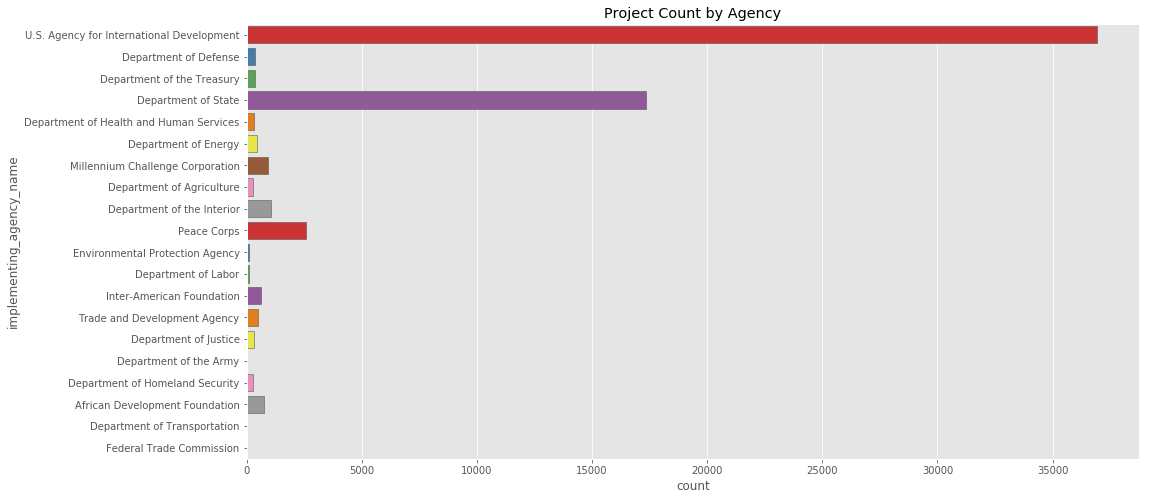

In [8]:
# Plot the different aid agencies from the dataset
plt.figure(figsize=(16, 8))
op = sns.countplot(y="implementing_agency_name", data=usaid_data, palette="Set1", edgecolor=".3").set_title('Project Count by Agency')

As we can see from the above plot, the vast majority of the records are related to USAID funding. However, there are still a fair amount of records related to other agencies, particularly the U.S. Department of State.  

Since our investigation is only interested in USAID funding we can remove all of the records that are not associated with USAID from the "implementing agency" category.

In [9]:
# Cut the dataframe to only include USAID data
usaid_data = usaid_data.loc[usaid_data['implementing_agency_acronym'] == 'USAID']

Even though we now have data containing only USAID records, we can trim down the dataset much further.

For instance, the country_name category relates to the recipient country. Some of the aid issued covers territories, such as geographic regions and worldwide projects that cover multiple regions and countries. Additionally, per USAID, "assistance that cannot be assigned to a specific benefitting country is assigned to a geographic regional recipient, denoted by a suffix 'Region' (FAE, 2019)."

We will only explore foreign assistance that is given directly to individual countries. Thus, we can remove these regional and world projects from our dataset. To get a sense of the breadth of regions and countries included in our data, we can investigate the counts of each.

In [10]:
# Get the country counts
usaid_data.country_name.value_counts()

World                                 5075
Haiti                                  967
Ethiopia                               965
Kenya                                  893
Nigeria                                765
Afghanistan                            729
Uganda                                 720
Mozambique                             692
Tanzania                               673
West Africa Region                     652
Malawi                                 648
Pakistan                               641
Mali                                   620
Bangladesh                             596
Congo (Kinshasa)                       577
Liberia                                575
Ghana                                  556
Nepal                                  542
Indonesia                              540
Zambia                                 498
Senegal                                479
India                                  464
South Africa                           462
Guatemala  

As we can see, the majority of the projects fall into the "World" category. We will remove the "World" foreign assistance projects from the dataset, as well as the regional projects like "West Africa Region" or "Caribbean Region."

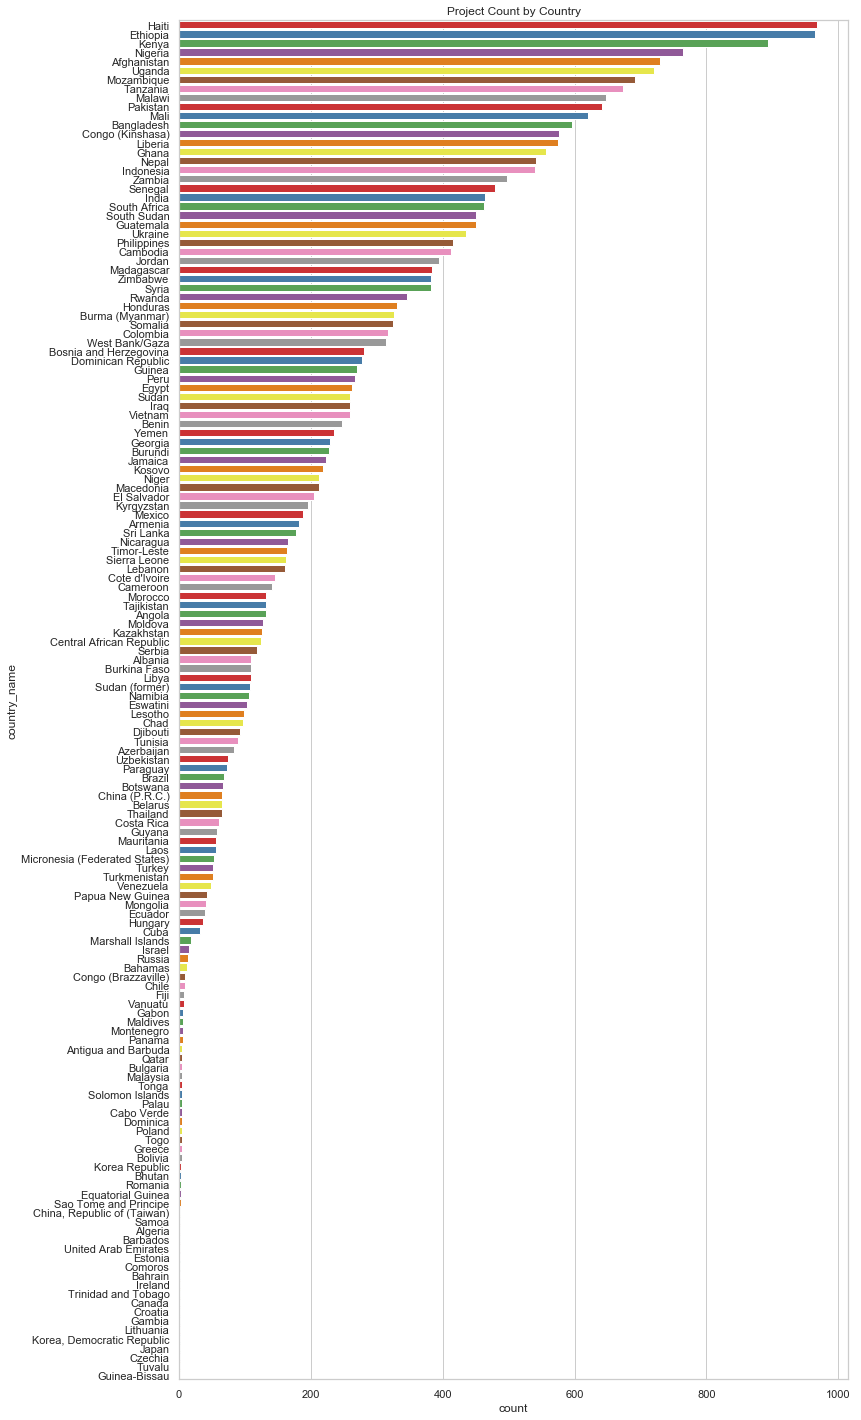

In [11]:
# Remove World and Regional aid categories
usaid_data = usaid_data.loc[usaid_data['country_name'] != 'World']
usaid_data = usaid_data[~usaid_data.country_name.str.contains("Region")]

# Check the counts and that all the correct regions were removed
plt.figure(figsize=(12, 25))
sns.set(style="whitegrid")
op = sns.countplot(y="country_name", data=usaid_data, palette="Set1", order = usaid_data['country_name'].value_counts().index).set_title('Project Count by Country')

We can see above that we have removed the world and regional projects, but still have an exhaustive collection of individual countries to investigate. We can continue to narrow our focus.

The dataset includes payments of either obligations or disbursements. We are only interested in the obligations - they are "defined as legal, binding and signed agreements between USAID and other entities that USAID agrees to pay for goods or services (FAE, 2019)."

Disbursements, meanwhile, are the amounts actually spent.

We are investigating how USAID identifies countries for assistance, plans its budget, and obligates the money. Thus, we are only interested in obligations and can remove all disbursement related data.


In [12]:
# Drop disbursments from the data and only include the obligated amounts
usaid_data = usaid_data.loc[usaid_data['transaction_type_name'] == 'Obligations']

We have now reduced our data to only include obligated funding for USAID projects from 2017 that went directly to countries.

Although we removed the regional and world projects, the "region_name" category still shows the world region that the project took place and is interesting information we'll want to maintain. 

However, there are MANY columns of data in this dataframe that are unnecessary for what we want to look at. Many relate to internal government coding (such as submission_id, activity_id, aid_type_group_name, etc), and others contain redundant information (such as country_id, income_group_id, implementing_agency_id, etc). We can remove these from the dataset as well.

Further, the data contains two US dollar categories - constant_amount and current_amount. We will use constant_amount as it is inflation-adjusted and is what USAID itself uses when comparing values over time. 

Lastly, we are only concerned about the fiscal year dates. We are not exploring the individual project activities dates and can remove those fields. Since we already subset the data by USAID funding, obligations, and fiscal year, we can remove those fields from the dataframe.

In [13]:
# Remove internal, government coding
usaid_data_dropped = usaid_data.drop(['submission_id', 'activity_id', 'activity_project_number', 'implementing_agency_name', 'implementing_subagency_id', 'subagency_acronym', 'subagency_name', 'channel_category_name', 'channel_subcategory_name', 'aid_type_group_name', 'dac_purpose_name', 'funding_account_name', 'funding_agency_name', 'funding_agency_acronym', 'assistance_category_name' ], axis=1)

# Remove redundant information
usaid_data_dropped = usaid_data_dropped.drop(['USG_sector_id', 'transaction_type_id', 'implementing_agency_id', 'income_group_id', 'country_id', 'channel_category_id', 'aid_type_group_id', 'channel_subcategory_id', 'channel_id', 'dac_category_id', 'dac_sector_code', 'dac_purpose_code', 'funding_account_id', 'funding_agency_id', 'region_id', 'assistance_category_id', 'income_group_acronym'], axis=1)

# Drop the "current_amount" values
usaid_data_dropped = usaid_data_dropped.drop(['current_amount'], axis=1)

# Remove the unnecessary dates and acronyms
usaid_data_dropped = usaid_data_dropped.drop(['implementing_agency_acronym','activity_start_date', 'activity_end_date', 'transaction_type_name', 'fiscal_year'], axis=1)

With our dataset containing only the categories we want to take moving forward, and everything else dropped, we will perform one last check of the values. We use the count() function as this will show us the total count of all non-NaN values.  

In [14]:
# Check the values
print(usaid_data_dropped.count())

country_code         13371
country_name         13371
region_name          13371
income_group_name    13301
channel_name         13371
dac_category_name    13371
dac_sector_name      13371
activity_name        13371
constant_amount      13371
USG_sector_name      13371
dtype: int64


We can see from the check that there are still some NaN values in the income_group_name. 

We use the isnull() function to display the rows that contain any NaN values.

In [15]:
# View what the NaN values correspond with
usaid_data_dropped[usaid_data_dropped.isnull().any(axis=1)]

,country_code,country_name,region_name,income_group_name,channel_name,dac_category_name,dac_sector_name,activity_name,constant_amount,USG_sector_name
72640,SDF,Sudan (former),Sub-Saharan Africa,NaN,U.S. Government - U.S. Agency for Internationa...,Administrative Costs,Operating Expenses,Administrative costs,1052724,Direct Administrative Costs
318676,SDF,Sudan (former),Sub-Saharan Africa,NaN,United Nations Children's Fund,Humanitarian,Emergency Response,"Protection, Assistance and Solutions",42926,"Protection, Assistance and Solutions"
520983,SDF,Sudan (former),Sub-Saharan Africa,NaN,Enterprise - United States Other,Humanitarian,Emergency Response,Crisis Assistance and Recovery,-2,"Protection, Assistance and Solutions"
521440,SDF,Sudan (former),Sub-Saharan Africa,NaN,"Chemonics International, Inc.",Agriculture,Agriculture,Program Support (Agriculture),-4,Agriculture
522443,SDF,Sudan (former),Sub-Saharan Africa,NaN,Unspecified Vendors - Country Other,Agriculture,Agriculture,Program Support (Agriculture),-12,Agriculture
524045,SDF,Sudan (former),Sub-Saharan Africa,NaN,Enterprise - United States Redacted,Administrative Costs,Administration and Oversight,Administration and Oversight,-31,Direct Administrative Costs
524753,SDF,Sudan (former),Sub-Saharan Africa,NaN,U.S. Government - U.S. Agency for Internationa...,Governance,Government and Civil Society,Program Support (Governance),-43,Good Governance
526508,SDF,Sudan (former),Sub-Saharan Africa,NaN,U.S. Government - Department of State,Governance,"Conflict, Peace, and Security",Program Support (Stabilization),-77,Stabilization Operations and Security Sector R...
528661,SDF,Sudan (former),Sub-Saharan Africa,NaN,Unspecified Vendors - Country Other,Humanitarian,Emergency Response,Program Support (Protection),-134,"Protection, Assistance and Solutions"
529053,SDF,Sudan (former),Sub-Saharan Africa,NaN,Enterprise - Non United States Other,Humanitarian,Emergency Response,Program Support (Protection),-147,"Protection, Assistance and Solutions"


We can see in the above frame that all of the NaN values relate to Sudan (former). Sudan (former) is the USAID name for Sudan pre-South Sudanese independence in 2011.

Thus, all this information refers to the united, pre-2011 Sudan. Both current Sudan and South Sudan are in our dataset, so it is safe to remove Sudan (former) altogether. Any associated values are likely leftover bookkeeping costs, as Sudan (former) is no longer an entity that recieves funding. 

We will drop these from our dataset.

In [16]:
# Drop any rows containing NaN values (ie, Sudan (former))  
usaid_data_dropped = usaid_data_dropped.dropna()

We now have a thoroughly cut down and cleaned USAID dataset. We went from over 950,000 records to just over 13,300. 

Before moving onto to joining the other data, it is worth exploring this USAID data a little bit with some basic visualisations.

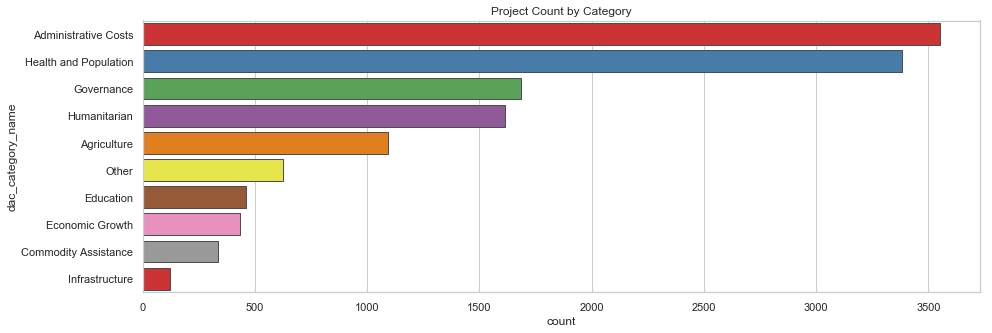

In [17]:
# Category group counts
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")
op = sns.countplot(y="dac_category_name", data=usaid_data_dropped, palette="Set1", edgecolor=".3",order = usaid_data_dropped['dac_category_name'].value_counts().index).set_title('Project Count by Category')

The above bar chart shows us the number of projects by category. It is interesting the most common projects are related to administration. This category relates to USAIDs own, internal functioning and not explicitly to aid going to the recipient country.

We can break this down further by looking at the individual sectors of these broader categories. 

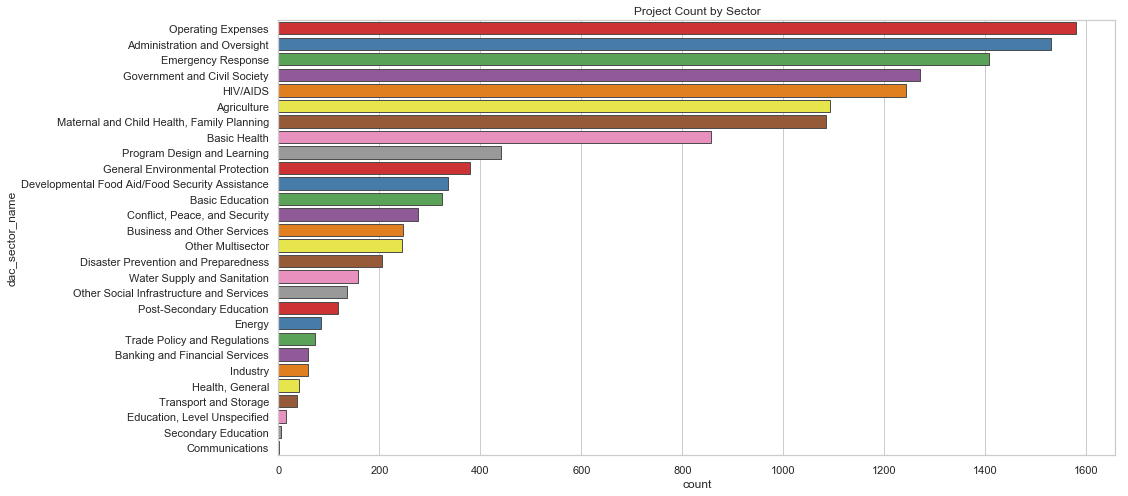

In [18]:
# Sector group counts
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
op = sns.countplot(y="dac_sector_name", data=usaid_data_dropped, palette="Set1",edgecolor=".3", order = usaid_data_dropped['dac_sector_name'].value_counts().index).set_title('Project Count by Sector')


The top two sectors that have the most associated projects are indeed administration related. However, after that the most prominent projects are needs-based. This might be an early indication that USAID assigns a significant portion of aid to basic human needs projects.

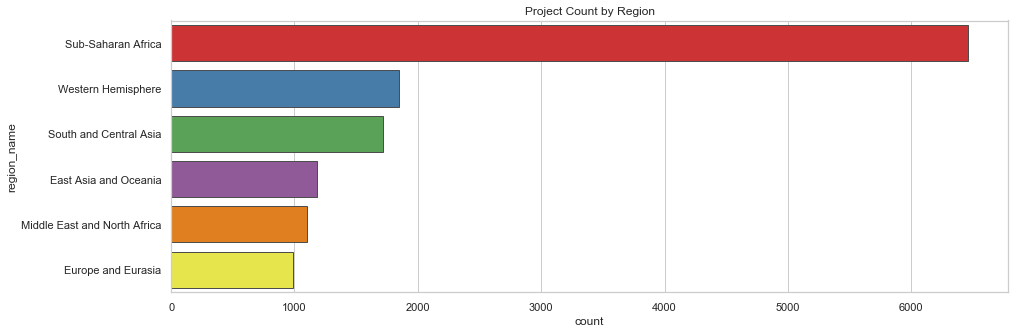

In [19]:
# Region group counts
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")
op = sns.countplot(y="region_name", data=usaid_data_dropped, palette="Set1", edgecolor=".3", order = usaid_data_dropped['region_name'].value_counts().index).set_title('Project Count by Region')


The region with the most projects receiving foreign assistance is Sub-Saharan Africa. We may have expected this since it is one of the poorest regions of the world with a significant number of developing countries.

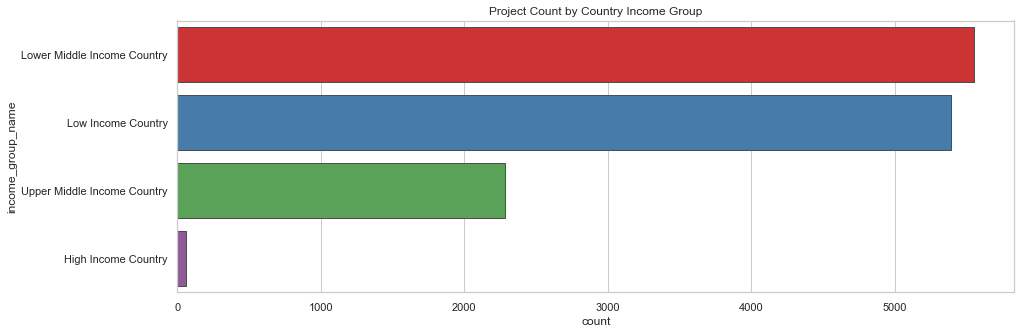

In [20]:
# Income group counts
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")
op = sns.countplot(y="income_group_name", data=usaid_data_dropped, palette="Set1", edgecolor=".3", order = usaid_data_dropped['income_group_name'].value_counts().index).set_title('Project Count by Country Income Group')


Finally, we can see that most projects go to Lower Middle Income and Low Income classified countries. This is reasonable to expect.

### Country Indicator Data <a name="country_indicators"></a>

The next set of data we will import is the World Indexes data. After some light cleaning we will join this with the USAID dataframe.

The World Indexes data contains 65 columns of different world indexes and indicators, with some of them more interesting and helpful than others.

The statistics themselves are compiled from these sources: 

- UNDESA;
- UNESCO Institute for Statistics;
- United Nations Statistics Division;
- World Bank;
- IMF.

Because we have extracted our own indicators from UNData (that we will import next) we only want to take a few indexes/indicators that are not present in the UNData from the World Indexes dataset.

First we will import the data as a dataframe and look at the categories to decide which ones we want to keep.

In [21]:
# Load in the World Indexes data to a dataframe and check the categories
world_data = pd.read_csv('world_indexes.csv')
world_data.head()


,Id,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,Domestic credit provided by financial sector 2013,Domestic food price level 2009 2014 index,Domestic food price level 2009-2014 volitility index,Electrification rate or population,Expected years of schooling - Years,Exports and imports percentage GPD 2013,Female Suicide Rate 100k people,Foreign direct investment net inflows percentage GDP 2013,Forest area percentage of total land area 2012,Fossil fuels percentage of total 2012,Fresh water withdrawals 2005,Gender Inequality Index 2014,General government final consumption expenditure - Annual growth 2005 2013,General government final consumption expenditure - Perce of GDP 2005-2013,Gross domestic product GDP 2013,Gross domestic product GDP percapta,Gross fixed capital formation of GDP 2005-2013,Gross national income GNI per capita - 2011 Dollars,Homeless people due to natural disaster 2005 2014 per million people,Homicide rate per 100k people 2008-2012,Infant Mortality 2013 per thousands,International inbound tourists thausands 2013,International student mobility of total tetiary enrolvemnt 2013,Internet users percentage of population 2014,Intimate or nonintimate partner violence ever experienced 2001-2011,Life expectancy at birth- years,MaleSuicide Rate 100k people,Maternal mortality ratio deaths per 100 live births 2013,Mean years of schooling - Years,Mobile phone subscriptions per 100 people 2014,Natural resource depletion,Net migration rate per 1k people 2010-2015,Physicians per 10k people,Population affected by natural desasters average annual per million people 2005-2014,Population living on degraded land Percentage 2010,Population with at least some secondary education percent 2005-2013,Pre-primary 2008-2014,Primary-2008-2014,Primary school dropout rate 2008-2014,Prison population per 100k people,Private capital flows percentage GDP 2013,Public expenditure on education Percentange GDP,Public health expenditure percentage of GDP 2013,Pupil-teacher ratio primary school pupils per teacher 2008-2014,Refugees by country of origin,Remittances inflows percentual GDP 2013,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
0,Norway,0.944,26.830,7.834,100.000,0.779,9.193,11.915,5.220,104.194,86.956,1.510,11.300,100.000,17.493,67.036,5.200,0.513,27.973,57.272,0.750,0.067,1.815,21.853,317.498,"62,448.018",22.644,"64,992.340",0.000,2.200,2.300,"4,963.000",-3.374,96.300,26.800,81.600,13.000,4.000,12.631,116.510,9.019,6.000,37.390,12.348,0.187,97.060,98.851,99.437,1.512,72.000,11.467,6.553,9.573,9.591,0.013,0.154,47.753,1.655,111.061,39.645,13.773,31.798,74.101,27.288,0.140,2.800
1,Australia,0.935,34.010,12.059,100.000,1.090,16.519,-4.562,30.270,107.789,158.841,1.360,6.300,100.000,20.221,40.996,5.200,3.330,19.194,95.368,3.930,0.110,-0.017,17.747,990.721,"42,831.062",28.327,"42,260.613",33.407,1.100,3.400,"6,382.000",17.132,84.560,39.900,82.400,16.100,6.000,12.963,131.230,3.820,6.500,32.730,"1,337.394",8.985,94.449,107.777,104.838,6.119,130.000,-6.789,5.110,8.999,12.303,0.025,0.158,4.632,2.386,135.535,30.531,27.712,65.334,86.334,21.361,0.190,4.000
2,Switzerland,0.930,32.350,1.900,100.000,-1.101,4.625,8.567,16.720,99.317,173.429,1.350,6.600,100.000,15.790,132.183,5.100,-1.193,31.613,51.076,12.313,0.028,1.447,10.964,442.037,"54,697.467",23.417,"56,431.068",0.000,0.600,3.600,"8,967.000",12.615,87.000,39.000,83.000,13.

Viewing the categories above, we are most interested in the indexes (such as Gini coefficient or Consumer Price Index) and aggregated statistics (combined life expectancy or average years of schooling). These statistics are not easily accessed with the UNData, but they are helpful development indicators that we would like to include our analysis. 


To do so, we will make a new dataframe that contains only the categories we want to use moving forward.

In [22]:
# Make another dataframe of the categories we want to keep moving forward
world_data = world_data[['Id','Gini coefficient 2005-2013', 'Consumer price index 2013', 'Foreign direct investment net inflows percentage GDP 2013', 'Gender Inequality Index 2014', 'Life expectancy at birth- years', 'Mean years of schooling - Years']]
world_data.head()

,Id,Gini coefficient 2005-2013,Consumer price index 2013,Foreign direct investment net inflows percentage GDP 2013,Gender Inequality Index 2014,Life expectancy at birth- years,Mean years of schooling - Years
0,Norway,26.830,104.194,0.513,0.067,81.600,12.631
1,Australia,34.010,107.789,3.330,0.110,82.400,12.963
2,Switzerland,32.350,99.317,-1.193,0.028,83.000,12.823
3,Denmark,26.880,106.058,0.476,0.048,80.200,12.729
4,Netherlands,28.870,107.474,3.762,0.062,81.600,11.889


### United Nations Data  <a name="UNData"></a>


Next we will import our own, selected UN development indicators. The UN maintains thousands of different country-level indicators. For our purposes we selected a collection of the major development indicators to join with the rest of our data. We selected a range of categories that covered general country details, economics, social (health, education), and infrastructure indicators.

We avoided categorical data as we already have a number of categories from our other data sets. First, we will import our selected indicators and set all of the data types to numeric (except the Country name index).

In [23]:
# Import the UNData
UN_data = pd.read_csv('UN_indices.csv')

# Convert all data to numeric (except for 'Country' column)
cols=[i for i in UN_data.columns if i not in ["country"]]
for col in cols:
    UN_data[col]=pd.to_numeric(UN_data[col], errors = 'coerce')
    
UN_data.head()

,country,Population (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),International trade: Exports (million US$),International trade: Imports (million US$),Urban population (% of total population),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births),Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)"
0,Afghanistan,35530000,54.400,106.300,623.200,23.300,23.300,53.300,61.600,10.000,28.500,8.600,"1,458.000","3,568.000",26.700,5.300,68.600,61.600,42,63,5
1,Albania,2930000,106.900,101.900,"3,984.200",22.400,26.000,51.700,41.400,18.300,40.300,15.800,"1,962.000","4,669.000",57.400,1.700,14.600,106.400,130,84,36
2,Algeria,41318000,17.300,102.000,"4,154.100",12.200,37.300,50.500,10.800,34.500,54.700,11.400,"29,992.000","47,091.000",70.700,3.000,27.700,113.000,135,5900,55
3,American Samoa,56000,278.200,103.600,-99.000,-99.000,-99.000,-99.000,nan,nan,nan,nan,-99.000,-99.000,87.200,2.600,9.600,nan,92,-99,-99
4,Andorra,77000,163.800,102.300,"39,896.400",0.500,10.800,88.600,-99.000,-99.000,-99.000,-99.000,100.000,"1,355.000",85.100,1.200,-99.000,88.100,13,1,119


As we can see, our UN data covers 229 countries along with 20 different development indicators that cover some of the most vital development indicators.

We can also see immidiately that there is some missing data. The UN data covers 229 countries and territories, most of which won't be in our USAID or World Indexes data. 

The UN uses the code "-99" for any missing data, so we can easily identify which countries are missing data.

In [24]:
# View which countries we are missing data
missing_data_list = UN_data[UN_data.isin([-99]).any(axis=1)]
missing_data_list


,country,Population (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),International trade: Exports (million US$),International trade: Imports (million US$),Urban population (% of total population),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births),Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)"
3,American Samoa,56000,278.200,103.600,-99.000,-99.000,-99.000,-99.000,nan,nan,nan,nan,-99.000,-99.000,87.200,2.600,9.600,nan,92,-99,-99
4,Andorra,77000,163.800,102.300,"39,896.400",0.500,10.800,88.600,-99.000,-99.000,-99.000,-99.000,100.000,"1,355.000",85.100,1.200,-99.000,88.100,13,1,119
6,Anguilla,15000,165.700,97.600,"21,879.600",2.300,15.700,82.000,nan,nan,nan,nan,2.000,154.000,100.000,nan,-99.000,177.900,52,0,136
7,Antigua and Barbuda,102000,231.800,92.300,"14,764.500",1.900,18.300,79.800,nan,nan,nan,nan,61.000,491.000,23.800,2.100,9.100,137.200,55,-99,84
22,Bermuda,61000,"1,227.000",91.400,"94,399.900",0.700,5.300,94.000,1.600,10.300,87.600,6.700,8.000,971.000,100.000,1.500,-99.000,58.000,72,1,136
25,"Bonaire, Sint Eustatius and Saba",25000,77.400,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,74.700,-99.000,-99.000,-99.000,56,0,208
29,British Virgin Islands,31000,208.000,97.100,"30,144.500",1.000,11.100,87.800,nan,nan,nan,-99.000,nan,444.000,46.200,nan,-99.000,145.800,67,0,85
38,Cayman Islands,62000,256.500,100.400,"62,132.000",0.300,7.500,92.200,0.800,15.500,83.600,6.300,18.000,991.000,100.000,nan,-99.000,155.500,74,-99,130
41,Channel Islands,165000,870.100,98.400,-99.000,-99.000,-99.000,-99.000,5.000,24.500,70.500,8.700,-99.000,-99.000,31.500,1.500,7.900,-99.000,-99,-99,-99
43,"China, Hong Kong SAR",7365000,"7,014.200",85.100,"42,431.000",0.100,7.200,92.700,0.200,14.900,84.900,3.500,"516,588.000","547,124.000",100.000,1.200,1.600,228.800,64,-99,83


We see from this list that the countries with missing data are all more or less small territories. We can drop these countries from our dataframe since USAID does not provide assistance to them.

In [25]:
# Drop the countries that we are missing UN data for from our list
cond = UN_data['country'].isin(missing_data_list['country']) == True
UN_data.drop(UN_data[cond].index, inplace = True)

With those dropped, we can will use the count() function as before to identify any further missing values (NaN).

In [26]:
# Check counts for further NaN values
UN_data.count()

country                                                  184
Population (2017)                                        184
Population density (per km2, 2017)                       184
Sex ratio (m per 100 f, 2017)                            184
GDP per capita (current US$)                             184
Economy: Agriculture (% of GVA)                          183
Economy: Industry (% of GVA)                             184
Economy: Services and other activity (% of GVA)          184
Employment: Agriculture (% of employed)                  182
Employment: Industry (% of employed)                     182
Employment: Services (% of employed)                     182
Unemployment (% of labour force)                         182
International trade: Exports (million US$)               184
International trade: Imports (million US$)               184
Urban population (% of total population)                 184
Fertility rate, total (live births per woman)            184
Infant mortality rate (p

It appears we still have some NaN values in the income group categories. We can use the isnull() function again to show us which countries contain NaN values.

In [27]:
# Check what the NaN values relate to
UN_data[UN_data.isnull().any(axis=1)]

,country,Population (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),International trade: Exports (million US$),International trade: Imports (million US$),Urban population (% of total population),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births),Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)"
10,Aruba,105000,584.800,90.400,"26,005.400",0.500,15.400,84.100,0.600,14.000,85.100,nan,95.000,"1,117.000",41.500,1.800,14.800,135.700,32,1,120
108,Kiribati,116000,143.700,97.300,"1,442.900",24.100,13.600,62.200,nan,nan,nan,nan,3.000,116.000,44.300,3.800,46.900,38.800,104,0,8
126,Marshall Islands,53000,295.200,104.500,"3,452.600",16.400,10.200,73.300,nan,nan,nan,4.700,27.000,86.000,72.700,4.100,25.400,29.200,101,0,27
182,Singapore,5709000,"8,155.500",97.700,"52,239.000",nan,26.400,73.600,0.300,17.000,82.600,2.000,"329,871.000","283,009.000",100.000,1.200,2.100,146.100,293,27,209


The countries with NaN values are more small countries and territories that will not be part of our final analysis. We will drop them and do a final value check to confirm that we only have complete records.

In [28]:
# Drop the remaining countries with missing values from our dataset
UN_data = UN_data.dropna()

print(UN_data.count())

country                                                  180
Population (2017)                                        180
Population density (per km2, 2017)                       180
Sex ratio (m per 100 f, 2017)                            180
GDP per capita (current US$)                             180
Economy: Agriculture (% of GVA)                          180
Economy: Industry (% of GVA)                             180
Economy: Services and other activity (% of GVA)          180
Employment: Agriculture (% of employed)                  180
Employment: Industry (% of employed)                     180
Employment: Services (% of employed)                     180
Unemployment (% of labour force)                         180
International trade: Exports (million US$)               180
International trade: Imports (million US$)               180
Urban population (% of total population)                 180
Fertility rate, total (live births per woman)            180
Infant mortality rate (p

We now have a cleaned dataset with records for 180 countries. 

We will now join our UNData with the World Indexes dataframe we previously cleaned. We will merge them using the country name as the similar field. 

First, we must check what the country names are in each dataset. They will likely be differences and we will need to adjust them in order to merge correctly. 

In [29]:
# Check which countries are missing between the two datasets. 
print(set(world_data['Id']).symmetric_difference(UN_data['country']))

{'Bolivia', 'Republic of Korea', 'Vietnam', "Lao People's Democratic Republic", 'Cabo Verde', 'Antigua and Barbuda', "Democratic People's Republic of Korea", 'Viet Nam', 'Liechtenstein', 'Tanzania', 'Cape Verde', 'Singapore', 'The former Yugoslav Republic of Macedonia', 'Macedonia', 'Moldova', 'Czechia', "Côte d'Ivoire", 'New Caledonia', 'Brunei', 'Bolivia (Plurinational State of)', 'Sao Tome and Principe', 'Republic of the Congo', 'Palau', 'United Republic of Tanzania', 'State of Palestine', 'Venezuela (Bolivarian Republic of)', 'United States of America', 'United States', 'Czech Republic', 'Saint Kitts and Nevis', 'Timor-Leste', 'Palestine', 'Somalia', 'Dominica', 'Brunei Darussalam', 'South Korea', 'East Timor', 'Republic of Moldova', 'Andorra', 'Micronesia', 'French Polynesia', 'Iran', 'Grenada', 'Russia', 'Syrian Arab Republic', 'Congo', 'Kiribati', 'Venezuela', 'Syria', 'São Tomé and Príncipe', 'Laos', 'Iran (Islamic Republic of)', 'Hong Kong\xa0', 'Russian Federation'}


Now that we know which country names are spelled differently (ie Viet Nam vs Vietnam), we can correct the spellings in order to merge on this value.

In [30]:
# Fix the country names in order to merge them
UN_data['country'] = UN_data['country'].replace({'Viet Nam':'Vietnam', 'Venezuela (Bolivarian Republic of)':'Venezuela', "United States of America" : 'United States', 'United Republic of Tanzania' : 'Tanzania', 'The former Yugoslav Republic of Macedonia' : 'Macedonia', 'Syrian Arab Republic' : 'Syria', 'State of Palestine' : 'Palestine', 'Russian Federation' : 'Russia', 'Republic of Moldova' : 'Moldova', 'Republic of Korea' : 'South Korea', "Lao People's Democratic Republic" : 'Laos', 'Iran (Islamic Republic of)' : 'Iran', 'Czechia' : 'Czech Republic', 'Congo' : 'Republic of the Congo', 'Cabo Verde' : 'Cape Verde', 'Brunei Darussalam' : 'Brunei', 'Bolivia (Plurinational State of)' : 'Bolivia' })

# Rename the 'country' column so that it can be merged on this attribute
UN_data = UN_data.rename(index=str, columns={"country": 'Id'})

With the country names identical we can merge the two dataframes, our UNData and World Indexes data, into a single one.

In [31]:
# Merge into a single dataframe.
world_data_merged = UN_data.merge(world_data, how = 'inner', on = 'Id')
world_data_merged

,Id,Population (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),International trade: Exports (million US$),International trade: Imports (million US$),Urban population (% of total population),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births),Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Gini coefficient 2005-2013,Consumer price index 2013,Foreign direct investment net inflows percentage GDP 2013,Gender Inequality Index 2014,Life expectancy at birth- years,Mean years of schooling - Years
0,Afghanistan,35530000,54.400,106.300,623.200,23.300,23.300,53.300,61.600,10.000,28.500,8.600,"1,458.000","3,568.000",26.700,5.300,68.600,61.600,42,63,5,27.820,127.192,0.293,0.693,60.400,3.230
1,Albania,2930000,106.900,101.900,"3,984.200",22.400,26.000,51.700,41.400,18.300,40.300,15.800,"1,962.000","4,669.000",57.400,1.700,14.600,106.400,130,84,36,28.960,107.597,9.702,0.217,77.800,9.256
2,Algeria,41318000,17.300,102.000,"4,154.100",12.200,37.300,50.500,10.800,34.500,54.700,11.400,"29,992.000","47,091.000",70.700,3.000,27.700,113.000,135,5900,55,38.817,117.522,0.804,0.413,74.800,7.611
3,Angola,29784000,23.900,96.200,"4,714.100",6.800,51.200,42.000,4.200,37.600,58.200,6.600,"21,011.000","8,790.000",44.100,6.000,65.400,60.800,146,3902,25,42.660,136.130,-5.734,0.407,52.300,4.726
4,Argentina,44271000,16.200,95.900,"14,564.500",6.000,27.800,66.200,2.000,24.800,73.100,6.500,"57,733.000","55,610.000",91.800,2.300,13.700,143.900,256,3167,85,43.570,110.449,1.868,0.376,76.300,9.834
5,Armenia,2930000,102.900,88.800,"3,489.100",19.000,28.300,52.800,35.000,15.700,49.300,16.600,"1,776.000","3,230.000",62.700,1.600,13.200,115.200,114,48,46,30.300,116.799,3.549,0.318,74.700,10.870
6,Australia,24451000,3.200,99.300,"51,352.200",2.500,26.500,71.100,2.700,21.200,76.100,5.500,"189,630.000","189,406.000",89.400,1.900,3.900,132.800,948,15282,222,34.010,107.789,3.330,0.110,82.400,12.963
7,Austria,8736000,106.000,96.200,"44,117.700",1.300,28.300,70.400,4.700,25.600,69.700,6.200,"145,503.000","149,299.000",66.000,1.400,3.300,157.400,118,505,158,30.040,107.951,3.644,0.053,81.400,10.834
8,Azerbaijan,9828000,118.900,99.300,"5,438.700",6.700,49.900,43.400,36.700,14.200,49.100,5.200,"9,143.000","8,532.000",54.600,2.100,31.400,111.300,97,2459,61,33.030,111.585,3.561,0.303,70.800,11.160
9,Bahamas,395000,39.500,95.900,"22,817.200",1.600,12.700,85.700,3.900,14.200,81.900,14.700,365.000,"2,904.000",82.900,1.800,9.100,80.300,86,0,90,30.747,105.624,4.540,0.298,75.400,10.945


We now have a dataset of 174 countries with 27 different indexes and development indicators, as seen above. 

### Happiness Index Data <a name="happy_data"></a>

We will import the World Happiness Report as our last index. This is a score calculated by the United Nations using the Gallup World Poll survey data.

The data from the report is available as a CSV file. Like our other datasets we will use the 2017 Happiness Report.

As before, we will import the data and view the full extent of it. 

In [32]:
# Import the Happiness Index
happy_data = pd.read_csv('world_happiness_2017.csv')
happy_data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594,7.480,1.616,1.534,0.797,0.635,0.362,0.316,2.277
1,Denmark,2,7.522,7.582,7.462,1.482,1.551,0.793,0.626,0.355,0.401,2.314
2,Iceland,3,7.504,7.622,7.386,1.481,1.611,0.834,0.627,0.476,0.154,2.323
3,Switzerland,4,7.494,7.562,7.426,1.565,1.517,0.858,0.620,0.291,0.367,2.277
4,Finland,5,7.469,7.528,7.410,1.444,1.540,0.809,0.618,0.245,0.383,2.430


The report contains a number of columns, but we are only interested in the Happiness Score column. The other categories simply show how each factor relates to the final Happiness Score. 

We will thus subset this dataframe keeping only the country and their score.


In [33]:
# Subset the scores
happy_final = happy_data[['Country','Happiness.Score']]
happy_final.head()

,Country,Happiness.Score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469


With the Happiness data subsetted, we are ready to combine it with our other indicator dataframe. 

As before, we will merge the indicators and happiness data based their country name value, so first we must find the differences in country spelling and correct them. 

In [34]:
# Find the differences in country names and adjust them.
print(set(happy_final['Country']).symmetric_difference(world_data_merged['Id']))

{'Oman', 'Hong Kong S.A.R., China', 'Maldives', 'Suriname', 'Guyana', 'Solomon Islands', 'Cuba', 'North Cyprus', 'Fiji', 'Djibouti', 'Cape Verde', 'Singapore', 'Guinea-Bissau', 'Saint Lucia', 'Samoa', 'Brunei', 'Tonga', 'Republic of the Congo', 'Barbados', 'Seychelles', 'Saint Vincent and the Grenadines', 'Swaziland', 'Comoros', 'Palestine', 'Somalia', 'Congo (Brazzaville)', 'Vanuatu', 'Congo (Kinshasa)', 'Ivory Coast', 'Gambia', 'Equatorial Guinea', 'Kosovo', 'Taiwan Province of China', 'Papua New Guinea', 'Eritrea', 'Palestinian Territories', 'Democratic Republic of the Congo', 'Laos', 'Bahamas'}


In [35]:
# Fix the country names in each dataframe in order to merge them
world_data_merged['Id'] = world_data_merged['Id'].replace({'Republic of the Congo':'Congo (Brazzaville)', 'Democratic Republic of the Congo' : 'Congo (Kinshasa)' })
happy_final['Country'] = happy_final['Country'].replace({'Palestinian Territories':'Palestine'})

# Rename the ID column so that it can be merged on this attribute
world_data_merged = world_data_merged.rename(index=str, columns={"Id": "Country"})

C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


With our country names now identical we will merge the tables into a single one.


In [36]:
# Merge all of our indices together. 
merged_indexes = happy_final.merge(world_data_merged, how = 'inner', on = 'Country')
merged_indexes

,Country,Happiness.Score,Population (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),International trade: Exports (million US$),International trade: Imports (million US$),Urban population (% of total population),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births),Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Gini coefficient 2005-2013,Consumer price index 2013,Foreign direct investment net inflows percentage GDP 2013,Gender Inequality Index 2014,Life expectancy at birth- years,Mean years of schooling - Years
0,Norway,7.537,5305000,14.500,101.800,"74,185.500",1.800,34.600,63.500,2.200,20.200,77.600,5.100,"89,120.000","72,473.000",80.500,1.800,2.400,113.600,64,8204,233,26.830,104.194,0.513,0.067,81.600,12.631
1,Denmark,7.522,5734000,135.100,99.000,"53,149.300",1.200,22.900,75.800,2.400,19.200,78.400,6.000,"94,355.000","85,133.000",87.700,1.700,3.500,128.300,47,666,119,26.880,106.058,0.476,0.048,80.200,12.729
2,Iceland,7.504,335000,3.300,100.700,"50,936.000",6.400,24.000,69.700,4.000,17.700,78.200,3.600,"4,450.000","5,703.000",94.100,2.000,1.600,114.000,27,284,952,26.300,113.643,3.057,0.087,82.600,10.590
3,Switzerland,7.494,8476000,214.500,98.200,"80,831.100",0.700,25.500,73.800,3.500,20.400,76.100,4.600,"304,691.000","269,157.000",73.900,1.500,3.900,142.000,74,552,126,32.350,99.317,-1.193,0.028,83.000,12.823
4,Finland,7.469,5523000,18.200,97.200,"42,148.100",2.500,26.800,70.600,4.200,22.000,73.800,8.900,"57,326.000","60,502.000",84.200,1.800,2.300,135.500,36,757,257,27.790,107.890,-1.981,0.075,80.800,10.286
5,Netherlands,7.377,17036000,505.200,99.000,"44,332.100",1.800,20.000,78.200,2.200,15.900,81.900,5.600,"511,714.000","420,969.000",90.500,1.700,3.500,123.500,40,2447,178,28.870,107.474,3.762,0.062,81.600,11.889
6,Canada,7.316,36624000,4.000,98.500,"43,205.600",1.800,28.600,69.600,2.100,19.500,78.400,7.100,"388,911.000","402,954.000",81.800,1.600,4.700,81.900,122,19276,324,33.680,105.452,3.873,0.129,82.000,13.004
7,New Zealand,7.314,4706000,17.900,96.700,"38,294.300",6.500,23.000,70.600,5.900,21.400,72.600,5.500,"33,833.000","36,423.000",86.300,2.000,4.400,121.800,199,783,207,28.763,106.728,-0.274,0.157,81.800,12.503
8,Sweden,7.284,9911000,24.200,100.200,"50,687.500",1.300,26.300,72.400,1.800,18.200,79.900,7.300,"139,574.000","140,838.000",85.800,1.900,2.400,130.400,54,1428,206,26.080,103.830,-0.883,0.055,82.200,12.095
9,Australia,7.284,24451000,3.200,99.300,"51,352.200",2.500,26.500,71.100,2.700,21.200,76.100,5.500,"189,630.000","189,406.000",89.400,1.900,3.900,132.800,948,15282,222,34.010,107.789,3.330,0.110,82.400,12.963


Unfortunately we lost some countries in the merger. The countries lost were ones without data available for the Happiness Score, which is reasonable to expect. We still have a very robust set of indexes and indicators (28 categories) for 148 countries. 

This will be reduced further as we merge it with the USAID data because USAID only provides assistance to a fraction of these 148 countries. 

### Merging Data <a name="data_merge"></a>

Before merging with our USAID data, we are going to further transform the USAID data. Previously it was structured by project. However, since we are analysing on a country level, we need to consolidate the rows. We need to combine all of the obligated values by country, and eliminate the project-specific information (such as the sectors and activity names)

However, we will keep the dac_category_name value for each country. We will store this two ways. 

First, we will identify the most common (mode) assistance category in each country. This indicates the largest number of projects dedicated to a specific category and provides an indicator of importance.

Additionally, we will identify the assistance category that receives the most amount in obligated money. This, quite clearly, shows which aid category receives the most funding in each country. 

To start, we will consolidate each country into a single unique value and sum the obligated amount for all projects within that country.


In [37]:
# First, make a dataframe that consolidates each country and sums the obligated amounts for every project within that country.
usaid_amount_sum = usaid_data_dropped.groupby("country_name").sum()
usaid_amount_sum.sort_values(by=['constant_amount'])

,constant_amount
country_name,
Russia,-499443
Poland,-280827
Bolivia,-150595
Fiji,-78092
Croatia,-53058
Panama,-45548
Cabo Verde,-22972
Comoros,-19937
Sao Tome and Principe,-17318


We can see that some countries had negative obligations in 2017. This means money was de-obligated and funding was cut. We are interested in exploring the amount of POSITIVE obligated funding. We will drop the countries with negative obligations from our analysis. 

In [38]:
 # Remove any negative obligations
usaid_amount_sum = usaid_amount_sum[usaid_amount_sum['constant_amount'] > 0]  
usaid_amount_sum.sort_values(by=['constant_amount'])

,constant_amount
country_name,
Trinidad and Tobago,1334
Estonia,4797
Bahrain,5904
Barbados,12030
Maldives,14940
Qatar,24963
Japan,29005
Canada,49099
Romania,53374


Now we only have countries with positive obligations in 2017. Next, we consolidate our countries and find the most common and highest funded aid categories. 

We will make a subset dataframe with only the categories we want to keep moving forward - country, region, income group, and dac category. We are comfortable losing the other categories (such as channel name, activity name, and sector names) because they will not factor into our analysis. 

In this new, subset dataframe we consolidate the country rows (like above) and save the most common and highest funded aid categories.
 

In [48]:
 #The lambda and mode returns either mode if the dac_category_name has multiple modes. This tells us what most projects are dedicated towards.
usaid_data_cut = usaid_data_dropped2.groupby(['country_name','region_name', 'income_group_name'])['dac_category_name'].agg(lambda x: pd.Series.mode(x)[0]).to_frame()
usaid_data_cut

# Convert this new group to a dataframe
usaid_data_cut= usaid_data_cut.reset_index(level=['country_name', 'region_name', 'income_group_name'])
usaid_data_cut

,country_name,region_name,income_group_name,dac_category_name
0,Afghanistan,South and Central Asia,Low Income Country,Governance
1,Albania,Europe and Eurasia,Upper Middle Income Country,Administrative Costs
2,Algeria,Middle East and North Africa,Upper Middle Income Country,Humanitarian
3,Angola,Sub-Saharan Africa,Upper Middle Income Country,Health and Population
4,Antigua and Barbuda,Western Hemisphere,High Income Country,Humanitarian
5,Armenia,Europe and Eurasia,Lower Middle Income Country,Governance
6,Azerbaijan,Europe and Eurasia,Upper Middle Income Country,Administrative Costs
7,Bahamas,Western Hemisphere,High Income Country,Humanitarian
8,Bahrain,Middle East and North Africa,High Income Country,Humanitarian
9,Bangladesh,South and Central Asia,Lower Middle Income Country,Health and Population


In [39]:
# Create a dataframe of the categories we want. 
usaid_data_dropped2 = usaid_data_dropped[['country_name','region_name', 'income_group_name', 'dac_category_name']]


# The lambda and mode returns either mode if the dac_category_name has multiple modes. This tells us what most projects are dedicated towards.
usaid_data_cut = usaid_data_dropped2.groupby(['country_name','region_name', 'income_group_name'])['dac_category_name'].agg(lambda x: pd.Series.mode(x)[0]).to_frame()


# Convert this new group to a dataframe
usaid_data_cut= usaid_data_cut.reset_index(level=['country_name', 'region_name', 'income_group_name'])


# Gets the sums of each aid category by country. This will tell us which aid category receives the most funding in each country. 
category_sum = usaid_data_dropped.groupby(['country_name','dac_category_name'],as_index=False).agg({'constant_amount': 'sum'})


# Find the category with the highest obligated amount by country 
most_obligated = category_sum.groupby(['country_name'])['constant_amount'].transform(max) == category_sum['constant_amount']
most_obligated = category_sum[most_obligated]


# Drop the summed amount from the dataframe
most_obligated = most_obligated.drop(['constant_amount'], axis=1)


# Rename the column name for this category the column header
most_obligated = most_obligated.rename(index=str, columns={"dac_category_name": "Aid Category (Highest $)"})

most_obligated


,country_name,Aid Category (Highest $)
4,Afghanistan,Governance
11,Albania,Governance
12,Algeria,Humanitarian
16,Angola,Health and Population
19,Antigua and Barbuda,Humanitarian
24,Armenia,Governance
27,Azerbaijan,Administrative Costs
31,Bahamas,Humanitarian
32,Bahrain,Humanitarian
38,Bangladesh,Health and Population


We now have three dataframes - (1) one with the summed obligation amounts by country, (2) one with the region, income group, and most common project category for each country, and (3) one with the highest funded category by country.

We combine all of these to make our final USAID dataframe of all the categories we want with the rows consolidated by country and in a format want.

In [40]:
# Combine the three dataframes into the single USAID dataframe we'll continue to use. 
usaid_final = usaid_amount_sum.merge(usaid_data_cut, how = 'inner', on = 'country_name')
usaid_final = usaid_final.merge(most_obligated, how = 'inner', on = 'country_name')

usaid_final


,country_name,constant_amount,region_name,income_group_name,dac_category_name,Aid Category (Highest $)
0,Afghanistan,959612387,South and Central Asia,Low Income Country,Governance,Governance
1,Albania,9345492,Europe and Eurasia,Upper Middle Income Country,Administrative Costs,Governance
2,Algeria,981972,Middle East and North Africa,Upper Middle Income Country,Humanitarian,Humanitarian
3,Angola,46270179,Sub-Saharan Africa,Upper Middle Income Country,Health and Population,Health and Population
4,Antigua and Barbuda,107049,Western Hemisphere,High Income Country,Humanitarian,Humanitarian
5,Armenia,24501150,Europe and Eurasia,Lower Middle Income Country,Governance,Governance
6,Azerbaijan,9853320,Europe and Eurasia,Upper Middle Income Country,Administrative Costs,Administrative Costs
7,Bahamas,312006,Western Hemisphere,High Income Country,Humanitarian,Humanitarian
8,Bahrain,5904,Middle East and North Africa,High Income Country,Humanitarian,Humanitarian
9,Bangladesh,175686059,South and Central Asia,Lower Middle Income Country,Health and Population,Health and Population


This final USAID dataframe contains 132 countries that recieved obligated aid in 2017. 

Our last step of managing all our data is combining this USAID dataframe with the development indicators and indexes dataframe we created previously.

As before, we first check for country name differences between the USAID dataframe and indicators dataframe, and correct the differences in order to merge. In this step we also rename some of the indicator categories so that they are easier to understand and read.

In [41]:
# Find the differences
print(set(usaid_final['country_name']).symmetric_difference(merged_indexes['Country']))

{'Denmark', 'Burma (Myanmar)', 'China (P.R.C.)', 'Uruguay', 'Norway', 'Vanuatu', 'Lithuania', 'Cyprus', 'United States', 'Belgium', 'Antigua and Barbuda', 'Guyana', 'Dominica', 'Barbados', 'Portugal', 'Myanmar', 'Belize', 'Togo', 'United Arab Emirates', 'Sweden', 'Palestine', 'South Korea', 'Italy', 'Slovenia', 'Australia', 'New Zealand', 'Korea Republic', 'Germany', "Cote d'Ivoire", 'Argentina', 'Timor-Leste', 'Djibouti', 'Bolivia', 'Bahamas', 'Russia', 'Papua New Guinea', 'Poland', 'Czech Republic', 'Malta', 'China', 'Netherlands', 'Switzerland', 'Spain', 'Mauritius', 'Kosovo', 'Gambia', 'Cuba', 'United Kingdom', 'Finland', 'Kuwait', 'Saudi Arabia', 'Latvia', 'Tonga', 'Micronesia (Federated States)', 'Palau', 'Somalia', 'Austria', 'Solomon Islands', 'Laos', 'Croatia', 'Iran', 'Luxembourg', 'Maldives', 'West Bank/Gaza', 'Iceland', 'Marshall Islands', 'Samoa', 'Korea, Democratic Republic', 'Czechia', 'Panama', 'Gabon', 'France', 'Slovakia', 'Eswatini'}


In [42]:
# Fix the country names in order to merge them
usaid_final['country_name'] = usaid_final['country_name'].replace({'China (P.R.C.)':'China','Czechia' : 'Czech Republic', 'Korea Republic' : 'South Korea', 'West Bank/Gaza' : 'Palestine' })
merged_indexes['Country'] = merged_indexes['Country'].replace({'Myanmar':'Burma (Myanmar)'})

# Rename the ID column so that it can be merged on this attribute
usaid_final = usaid_final.rename(index=str, columns={"country_name": "Country"})

# Merge the two index tables into a single one.
aid_indexes = usaid_final.merge(merged_indexes, how = 'inner', on = 'Country')

# Lastly, before moving on, lets fix some of the column names to make it easier to read and pull data from.
aid_indexes = aid_indexes.rename(index=str, columns={"region_name" : "Region", "income_group_name" : "Income Group", "dac_category_name" : "Aid Category (Most Common)", "constant_amount": "Aid Amount", "Happiness.Score" : 'Happiness Index', 'Gini coefficient 2005-2013' : 'Gini Coefficient', 'Consumer price index 2013' : 'Consumer Price Index', 'Foreign direct investment net inflows percentage GDP 2013' : 'FDI Inflows - GDP Percentage', 'Forest area percentage of total land area 2012' : 'Forest Area - Total Land Percentage', 'Gender Inequality Index 2014' : 'Gender Inequality Index', "Life expectancy at birth- years" : "Life Expectancy", "Mean years of schooling - Years" : "Avg Years of Schooling"})

aid_indexes

,Country,Aid Amount,Region,Income Group,Aid Category (Most Common),Aid Category (Highest $),Happiness Index,Population (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),International trade: Exports (million US$),International trade: Imports (million US$),Urban population (% of total population),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births),Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Gini Coefficient,Consumer Price Index,FDI Inflows - GDP Percentage,Gender Inequality Index,Life Expectancy,Avg Years of Schooling
0,Afghanistan,959612387,South and Central Asia,Low Income Country,Governance,Governance,3.794,35530000,54.400,106.300,623.200,23.300,23.300,53.300,61.600,10.000,28.500,8.600,"1,458.000","3,568.000",26.700,5.300,68.600,61.600,42,63,5,27.820,127.192,0.293,0.693,60.400,3.230
1,Albania,9345492,Europe and Eurasia,Upper Middle Income Country,Administrative Costs,Governance,4.644,2930000,106.900,101.900,"3,984.200",22.400,26.000,51.700,41.400,18.300,40.300,15.800,"1,962.000","4,669.000",57.400,1.700,14.600,106.400,130,84,36,28.960,107.597,9.702,0.217,77.800,9.256
2,Algeria,981972,Middle East and North Africa,Upper Middle Income Country,Humanitarian,Humanitarian,5.872,41318000,17.300,102.000,"4,154.100",12.200,37.300,50.500,10.800,34.500,54.700,11.400,"29,992.000","47,091.000",70.700,3.000,27.700,113.000,135,5900,55,38.817,117.522,0.804,0.413,74.800,7.611
3,Angola,46270179,Sub-Saharan Africa,Upper Middle Income Country,Health and Population,Health and Population,3.795,29784000,23.900,96.200,"4,714.100",6.800,51.200,42.000,4.200,37.600,58.200,6.600,"21,011.000","8,790.000",44.100,6.000,65.400,60.800,146,3902,25,42.660,136.130,-5.734,0.407,52.300,4.726
4,Armenia,24501150,Europe and Eurasia,Lower Middle Income Country,Governance,Governance,4.376,2930000,102.900,88.800,"3,489.100",19.000,28.300,52.800,35.000,15.700,49.300,16.600,"1,776.000","3,230.000",62.700,1.600,13.200,115.200,114,48,46,30.300,116.799,3.549,0.318,74.700,10.870
5,Azerbaijan,9853320,Europe and Eurasia,Upper Middle Income Country,Administrative Costs,Administrative Costs,5.234,9828000,118.900,99.300,"5,438.700",6.700,49.900,43.400,36.700,14.200,49.100,5.200,"9,143.000","8,532.000",54.600,2.100,31.400,111.300,97,2459,61,33.030,111.585,3.561,0.303,70.800,11.160
6,Bahrain,5904,Middle East and North Africa,High Income Country,Humanitarian,Humanitarian,6.087,1493000,"1,963.900",168.300,"22,600.200",0.300,40.700,59.000,1.000,33.400,65.600,1.300,"12,892.000","14,749.000",88.800,2.100,6.900,185.300,36,961,413,29.003,105.645,3.006,0.265,76.600,9.419
7,Bangladesh,175686059,South and Central Asia,Lower Middle Income Country,Health and Population,Health and Population,4.608,164670000,"1,265.000",101.700,"1,207.900",15.500,28.100,56.300,40.600,19.100,40.300,4.000,"36,031.000","52,624.000",34.300,2.200,33.300,83.400,151,1438,11,32.120,126.443,1.001,0.503,71.600,5.073
8,Belarus,3505075,Europe and Eurasia,Upper Middle Income Country,Governance,Governance,5.569,9468000,46.700,87.000,"5,750.800",7.500,38.900,53.600,9.600,32.000,58.400,0.500,"23,414.000","27,464.000",76.700,1.600,3.600,123.600,25,155,122,26.460,288.647,3.132,0.151,71.300,11.977
9,Benin,32042828,Sub-Saharan Africa,Low Income Country,Health and Population,Health and Population,3.657,11176000,99.100,99.500,779.100,23.200,24.900,51.900,43.200,10.200,46.600,1.000,410.000,"2,630.000",44.000,5.200,67.700,85.600,88,96,17,43.530,110.713,3.853,0.614,59.600,3.300


We now have our complete table of the combined USAID data, world indexes, UNData, and Happiness Score. 

Since we are investigating the aid amount, we want to normalize this value to assist in our cross-country comparisons. To do so, we will create a new column of Aid Amount per Capita. This is simply the aid amount of each country divided by the total population.  

In [43]:
# Create a new column of the dataframe with aid amount - per capita, and place at front end of dataframe
aid_indexes['Aid Amount per Capita'] = aid_indexes['Aid Amount']/aid_indexes['Population (2017)']

# Move the new per capita value to the front of the dataframe
aid_indexes = aid_indexes[['Country', 'Aid Amount', 'Aid Amount per Capita', 'Region', 'Income Group',
       'Aid Category (Most Common)', 'Aid Category (Highest $)',
       'Happiness Index', 'Population (2017)',
       'Population density (per km2, 2017)', 'Sex ratio (m per 100 f, 2017)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'Urban population (% of total population)',
       'Fertility rate, total (live births per woman)',
       'Infant mortality rate (per 1000 live births)',
       'Mobile-cellular subscriptions (per 100 inhabitants)',
       'Individuals using the Internet (per 100 inhabitants)',
       'CO2 emission estimates (million tons/tons per capita)',
       'Energy production, primary (Petajoules)', 'Gini Coefficient',
       'Consumer Price Index', 'FDI Inflows - GDP Percentage',
       'Gender Inequality Index', 'Life Expectancy', 'Avg Years of Schooling']]

aid_indexes

,Country,Aid Amount,Aid Amount per Capita,Region,Income Group,Aid Category (Most Common),Aid Category (Highest $),Happiness Index,Population (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),International trade: Exports (million US$),International trade: Imports (million US$),Urban population (% of total population),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births),Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Gini Coefficient,Consumer Price Index,FDI Inflows - GDP Percentage,Gender Inequality Index,Life Expectancy,Avg Years of Schooling
0,Afghanistan,959612387,27.009,South and Central Asia,Low Income Country,Governance,Governance,3.794,35530000,54.400,106.300,623.200,23.300,23.300,53.300,61.600,10.000,28.500,8.600,"1,458.000","3,568.000",26.700,5.300,68.600,61.600,42,63,5,27.820,127.192,0.293,0.693,60.400,3.230
1,Albania,9345492,3.190,Europe and Eurasia,Upper Middle Income Country,Administrative Costs,Governance,4.644,2930000,106.900,101.900,"3,984.200",22.400,26.000,51.700,41.400,18.300,40.300,15.800,"1,962.000","4,669.000",57.400,1.700,14.600,106.400,130,84,36,28.960,107.597,9.702,0.217,77.800,9.256
2,Algeria,981972,0.024,Middle East and North Africa,Upper Middle Income Country,Humanitarian,Humanitarian,5.872,41318000,17.300,102.000,"4,154.100",12.200,37.300,50.500,10.800,34.500,54.700,11.400,"29,992.000","47,091.000",70.700,3.000,27.700,113.000,135,5900,55,38.817,117.522,0.804,0.413,74.800,7.611
3,Angola,46270179,1.554,Sub-Saharan Africa,Upper Middle Income Country,Health and Population,Health and Population,3.795,29784000,23.900,96.200,"4,714.100",6.800,51.200,42.000,4.200,37.600,58.200,6.600,"21,011.000","8,790.000",44.100,6.000,65.400,60.800,146,3902,25,42.660,136.130,-5.734,0.407,52.300,4.726
4,Armenia,24501150,8.362,Europe and Eurasia,Lower Middle Income Country,Governance,Governance,4.376,2930000,102.900,88.800,"3,489.100",19.000,28.300,52.800,35.000,15.700,49.300,16.600,"1,776.000","3,230.000",62.700,1.600,13.200,115.200,114,48,46,30.300,116.799,3.549,0.318,74.700,10.870
5,Azerbaijan,9853320,1.003,Europe and Eurasia,Upper Middle Income Country,Administrative Costs,Administrative Costs,5.234,9828000,118.900,99.300,"5,438.700",6.700,49.900,43.400,36.700,14.200,49.100,5.200,"9,143.000","8,532.000",54.600,2.100,31.400,111.300,97,2459,61,33.030,111.585,3.561,0.303,70.800,11.160
6,Bahrain,5904,0.004,Middle East and North Africa,High Income Country,Humanitarian,Humanitarian,6.087,1493000,"1,963.900",168.300,"22,600.200",0.300,40.700,59.000,1.000,33.400,65.600,1.300,"12,892.000","14,749.000",88.800,2.100,6.900,185.300,36,961,413,29.003,105.645,3.006,0.265,76.600,9.419
7,Bangladesh,175686059,1.067,South and Central Asia,Lower Middle Income Country,Health and Population,Health and Population,4.608,164670000,"1,265.000",101.700,"1,207.900",15.500,28.100,56.300,40.600,19.100,40.300,4.000,"36,031.000","52,624.000",34.300,2.200,33.300,83.400,151,1438,11,32.120,126.443,1.001,0.503,71.600,5.073
8,Belarus,3505075,0.370,Europe and Eurasia,Upper Middle Income Country,Governance,Governance,5.569,9468000,46.700,87.000,"5,750.800",7.500,38.900,53.600,9.600,32.000,58.400,0.500,"23,414.000","27,464.000",76.700,1.600,3.600,123.600,25,155,122,26.460,288.647,3.132,0.151,71.300,11.977
9,Benin,32042828,2.867,Sub-Saharan Africa,Low Income Country,Health and Population,Health and Population,3.657,11176000,99.100,99.500,779.100,23.200,24.900,51.900,43.200,10.200,46.600,1.000,410.000,"2,630.000",44.000,5.200,67.700,85.600,88,96,17,43.530,110.713,3.8

Finally, after everything, we have all the data we want to start analysing. We have 108 countries and 6 columns of aid information combined with 27 columns of indexes and development indicators. 

Unfortunately we did lose some information in this final merge. There are a few countries that USAID provides aid to, but we don't have data related to their indexes. This includes Somalia, Cuba, North Korea, and Kosovo. This is expected as those countries have questionable statistical record keeping. We lost data on a number of small, tropical islands (such as Bahamas, Samoa, Maldives) and some smaller African countries (Equatorial Guinea, Gambia), but the amount of obligated money to these countries was small and insignificant in our broader analysis. 

The countries we lost from the indexes dataframe during the merge relate to developed, high income countries such as the UK, France, Sweden, or Argentina. This is also expected as USAID does not provide foreign assistance to such countries.


## Data Pre-Processing and Exploration <a name="data_explore"></a>

Before moving into our analysis, we will conduct a final data check to ensure our data is clean with correct data types and distributions are what we expect. Since we performed significant cleaning on all the individual datasets before merging them, our final dataframe should be in good shape. 

First, we will view the columns and their value counts.

In [44]:
# Get a list of the columns, along with a count of all the non-null values in each column
aid_indexes.count()

Country                                                  108
Aid Amount                                               108
Aid Amount per Capita                                    108
Region                                                   108
Income Group                                             108
Aid Category (Most Common)                               108
Aid Category (Highest $)                                 108
Happiness Index                                          108
Population (2017)                                        108
Population density (per km2, 2017)                       108
Sex ratio (m per 100 f, 2017)                            108
GDP per capita (current US$)                             108
Economy: Agriculture (% of GVA)                          108
Economy: Industry (% of GVA)                             108
Economy: Services and other activity (% of GVA)          108
Employment: Agriculture (% of employed)                  108
Employment: Industry (% 

Above shows we have 108 countries with full data. From our cleaning earlier we know that each row corresponds to a specific country - 108 countries that USAID obligated money towards in 2017. All columns have 108 values which means we have scrubbed all the NaN values from our data. 

Now, we will do a final check of the data types in the columns.

In [45]:
# Check the data types for all these different fields. 
aid_indexes.dtypes

Country                                                   object
Aid Amount                                                 int64
Aid Amount per Capita                                    float64
Region                                                    object
Income Group                                              object
Aid Category (Most Common)                                object
Aid Category (Highest $)                                  object
Happiness Index                                          float64
Population (2017)                                          int64
Population density (per km2, 2017)                       float64
Sex ratio (m per 100 f, 2017)                            float64
GDP per capita (current US$)                             float64
Economy: Agriculture (% of GVA)                          float64
Economy: Industry (% of GVA)                             float64
Economy: Services and other activity (% of GVA)          float64
Employment: Agriculture (

Because we cleaned the data before all of the indices are correctly numeric fields. The only string fields relate to the country names, region, aid category, and income group, which is exactly what we want.

Finally, we will look at the summary descriptive stats for each numeric column to ensure that the distributions look correct and all the values are roughly what we would expect.

In [46]:
# Show the summary stats of all these fields
aid_indexes.describe()

,Aid Amount,Aid Amount per Capita,Happiness Index,Population (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),International trade: Exports (million US$),International trade: Imports (million US$),Urban population (% of total population),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births),Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Gini Coefficient,Consumer Price Index,FDI Inflows - GDP Percentage,Gender Inequality Index,Life Expectancy,Avg Years of Schooling
count,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000,108.000
mean,"131,110,290.278",7.166,4.973,"57,674,037.037",150.728,100.906,"6,657.244",14.825,30.780,54.447,32.759,19.363,47.879,8.594,"64,337.833","61,179.852",52.875,3.160,32.324,102.934,274.528,"2,851.981",67.185,39.326,122.929,4.492,0.421,68.940,7.332
std,"207,340,828.256",12.476,0.993,"187,830,751.892",250.634,20.990,"11,224.941",12.181,10.842,11.599,23.287,9.158,17.251,6.461,"223,698.968","177,207.533",21.446,1.520,24.264,34.706,371.283,"10,357.280",112.316,8.686,24.762,6.436,0.162,8.161,3.072
min,"1,334.000",0.000,2.693,"629,000.000",2.000,86.000,244.600,0.200,11.400,17.900,1.000,2.000,6.300,0.300,123.000,147.000,8.400,1.200,2.200,20.400,18.000,7.000,2.000,24.820,100.042,-5.734,0.091,49.800,1.374
25%,"5,253,009.750",0.384,4.258,"6,184,000.000",37.350,96.600,"1,106.400",5.175,23.925,47.550,13.325,14.000,34.825,4.100,"2,011.750","3,976.000",35.550,2.000,12.350,80.300,68.250,84.000,16.750,32.970,109.232,1.494,0.323,63.025,5.024
50%,"42,207,500.500",3.341,5.008,"16,267,500.000",80.900,98.750,"3,470.700",11.600,28.750,55.300,28.150,19.500,49.250,6.700,"6,096.500","9,824.000",54.200,2.600,26.000,105.200,126.500,400.500,31.000,37.980,116.919,3.099,0.429,70.700,7.400
75%,"146,990,490.000",8.784,5.637,"37,036,750.000",139.550,100.600,"6,363.850",20.900,36.075,62.000,45.700,25.125,61.225,11.500,"30,255.250","42,479.750",69.950,4.450,46.600,127.425,309.500,"1,454.750",71.500,44.605,127.277,4.686,0.538,74.900,9.917
max,"959,612,387.000",82.284,7.316,"1,409,517,000.000","1,963.900",301.200,"73,653.400",70.800,70.000,80.200,91.100,54.100,81.000,27.500,"2,118,981.000","1,588,696.000",99.200,7.400,94.400,187.200,"2,358.000","101,394.000",846.000,65.020,288.647,42.849,0.744,83.500,13.004


Our descriptive statistics look more or less as we would suspect. Many of the categories have different scales, but everything is within a range we would expect.

We can perform some initial visualisations to get a sense of the data. 

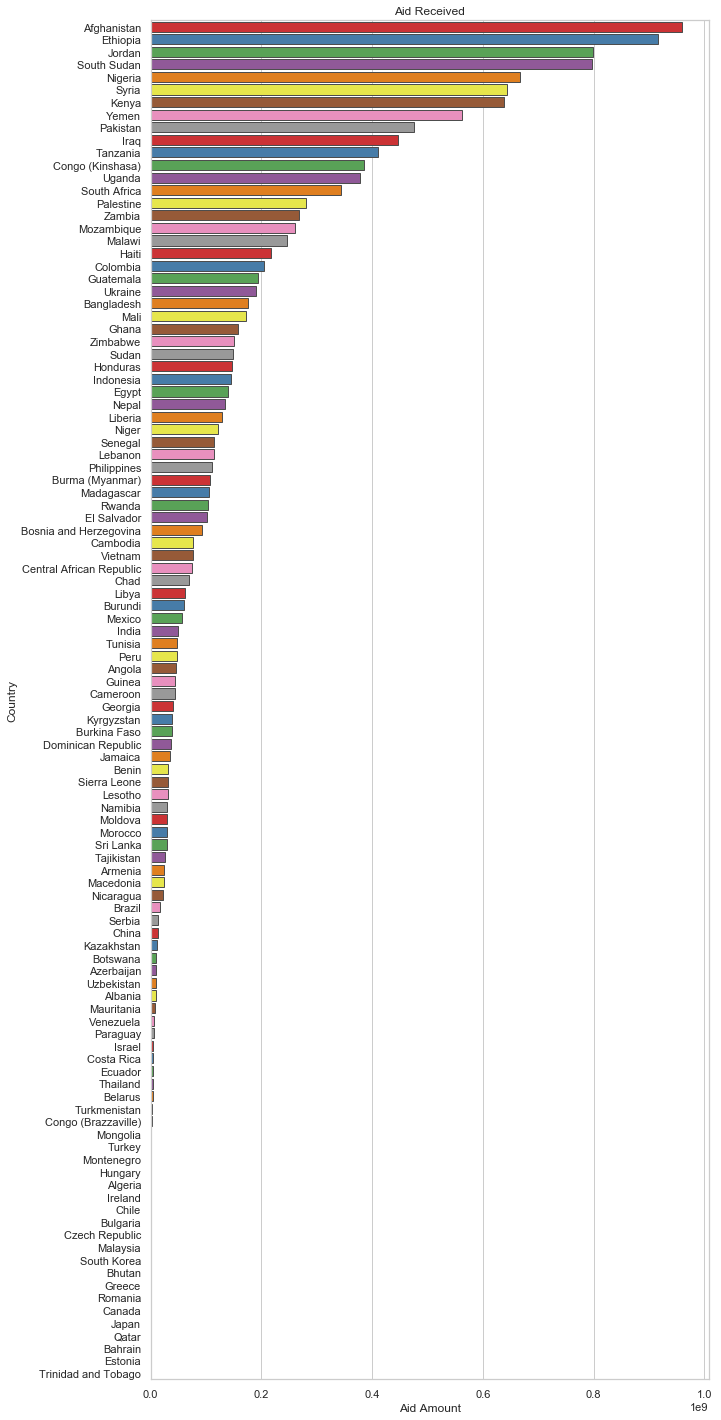

In [47]:
# Country aid received
sorted_a = aid_indexes.sort_values(by=['Aid Amount'], ascending=False)
plt.figure(figsize=(10, 25))
sns.set(style="whitegrid")
op = sns.barplot(x="Aid Amount", y="Country", palette="Set1", edgecolor=".3", data=sorted_a, ci=None).set_title('Aid Received')

The above chart shows us, in order, which countries received the most aid in 2017. Many of the usual suspects top the chart. Historically, the US has had a strong presence  in many of them, such as Afghanistan, Jordan, and South Sudan. Others have recently required significant needs-based support, such as Ethiopia, Syria, and Yemen.

We can compare this to the aid amount received per capita, as well. 

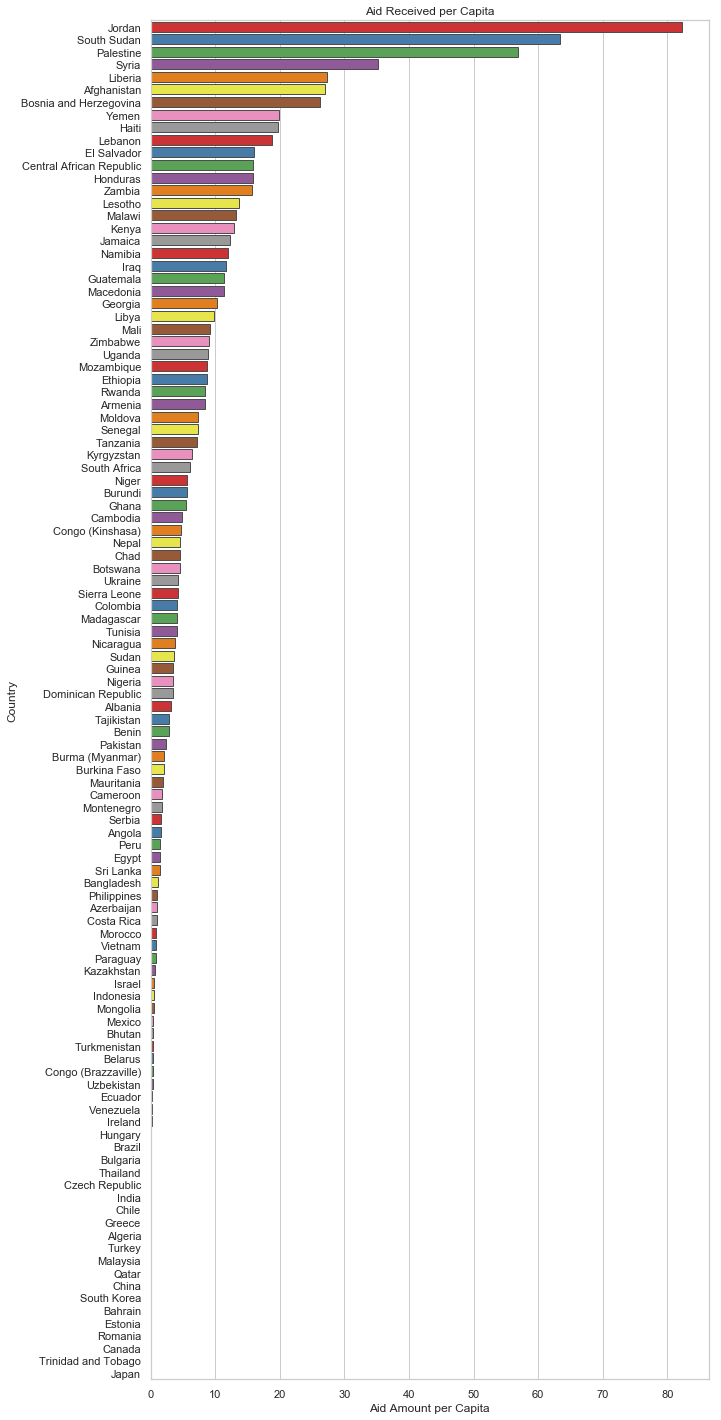

In [48]:
# Country aid received per capita
sorted_b = aid_indexes.sort_values(by=['Aid Amount per Capita'], ascending=False)
plt.figure(figsize=(10, 25))
sns.set(style="whitegrid")
op = sns.barplot(x="Aid Amount per Capita", y="Country", palette="Set1", edgecolor=".3", data=sorted_b, ci=None).set_title('Aid Received per Capita')

Per capita yields similar results. However, there are a couple interesting countries listed at the top of the chart when sorted by per capita funding. Palestine and Bosnia and Herzegovina are perhaps unexpectedly high, while Jordan is now the top country in funding.

We previously saw that projects related to administration were the majority of USAIDs projects. However, we can now visualise our new category of the amount of aid obligated for each sector.

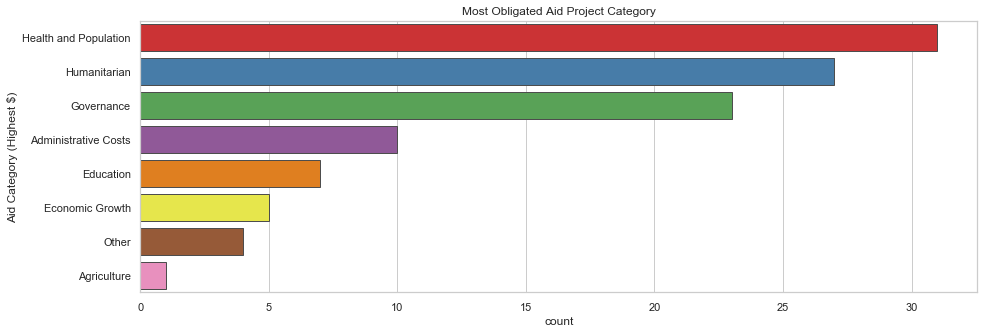

In [49]:
# Most obligated funds by category
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")
op = sns.countplot(y="Aid Category (Highest $)", data=aid_indexes, palette="Set1",edgecolor=".3", order = aid_indexes['Aid Category (Highest $)'].value_counts().index).set_title('Most Obligated Aid Project Category')


Now we can see that Health and Population projects receive the most funding, followed by Humanitarian. This is what we may expect and possibly suggests that USAID obligates most funding for basic human needs projects. The categories most related to foreign policy, Governance and Economic Growth, appear to receive less in funding than the critical livelihood categories of health and humanitarian work. 

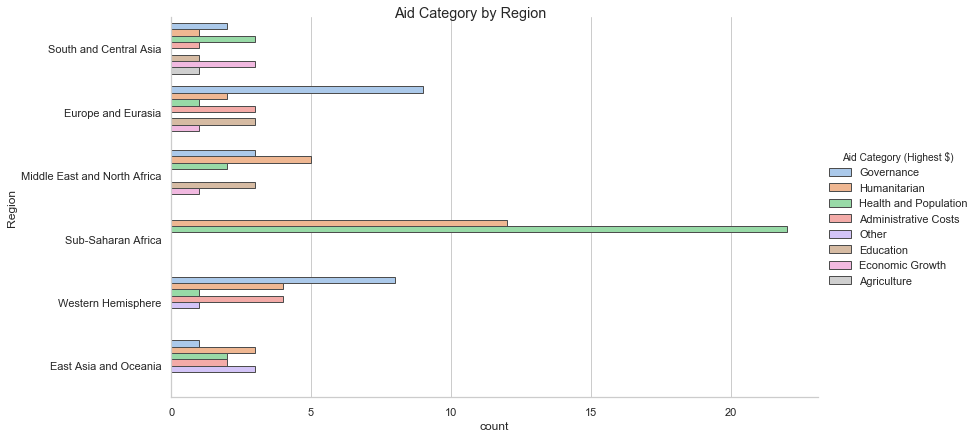

In [50]:
# Visualize which regions got which aid categories
sns.set(style="whitegrid")
a=sns.catplot(y="Region", hue="Aid Category (Highest $)", kind="count", palette="pastel",  edgecolor=".3", data=aid_indexes,height=6, aspect=2)
op = a.fig.suptitle('Aid Category by Region')

The above plot, which shows the highest obligated aid categories by region, further illuminates our previous charts. We see that the most obligated funds in Sub-Saharan Africa go to health and humanitarian projects. In the Western Hemisphere and Europe and Eurasia, most funding goes towards Governance projects. 

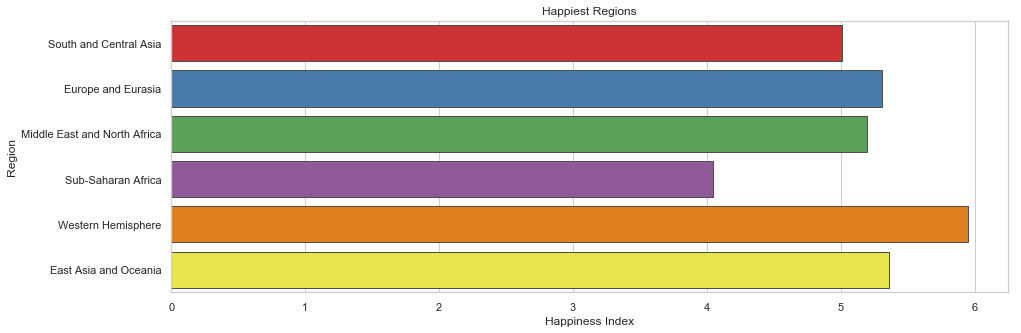

In [51]:
# Shows happiest countries by region
plt.figure(figsize=(15, 5))
sns.set(style="whitegrid")
op = sns.barplot(x="Happiness Index", y="Region", palette="Set1", edgecolor=".3", data=aid_indexes, ci=None).set_title('Happiest Regions')


By plotting the Happiness Scores by region we get a sense of the happiest regions of our dataset. The Western Hemisphere, which is essentially Latin American countries, is the happiest while Sub-Saharan Africa is the least happy by almost two index points. 

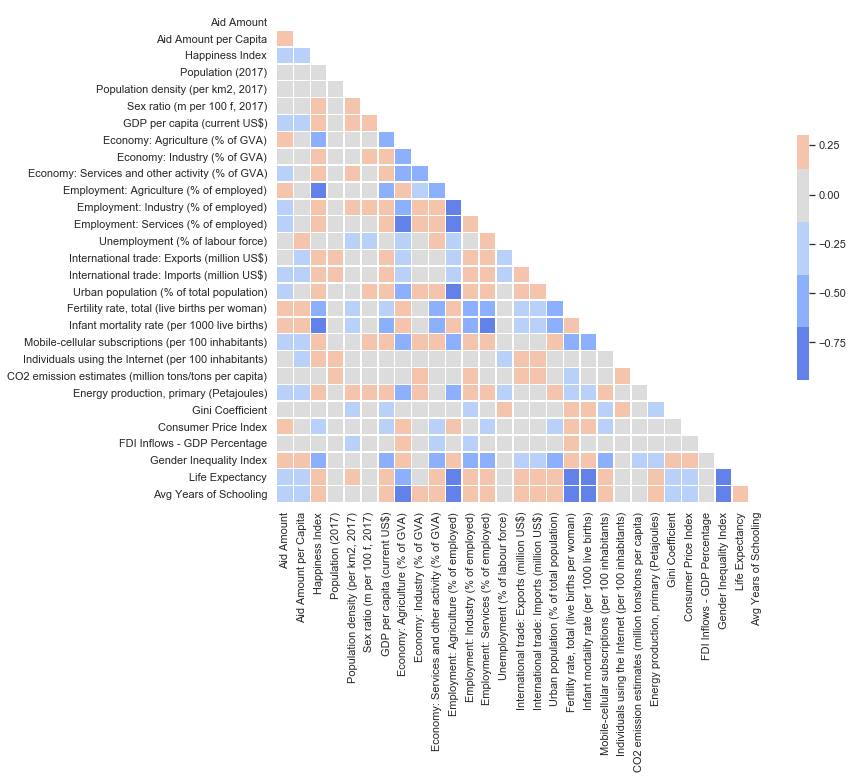

In [52]:
# Pearson heatmap correlation matrix of the values

#aid_indexes.corr()
corr = aid_indexes.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.color_palette("coolwarm", 7)

# Draw the heatmap with the mask and correct aspect ratio
op = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The Pearson correlation matrix, above, gives us a sense of how all the categories are related with each other. By using the divergent colour scheme we can quickly scan the matrix for any interesting correlations. A score of 1 implies perfect correlation, -1 implies perfect negative correlation, and 0 suggests no correlation. 

One aspect that stands out is the lack of positive correlations. Most of the correlated categories have negative correlations. Some are expected (high infant mortality is correlated with low life expectancy) while some are quite interesting (high GDP per capita is correlated with high gender equity). 


C:\Users\Robert\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


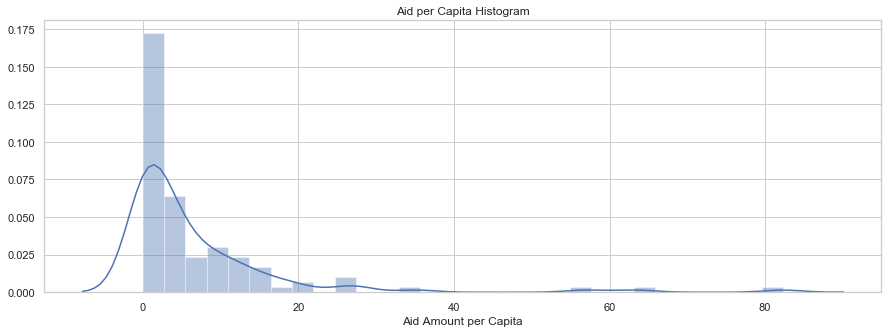

In [53]:
# Plot histogram
plt.figure(figsize=(15, 5))
op = sns.distplot(aid_indexes["Aid Amount per Capita"], bins=30, color = "b").set_title('Aid per Capita Histogram')


Our last plot shows a histogram of how aid per capita is distributed. The skewed, long-tail histogram shows that the vast majority of countries have low aid per capita amounts.

## Data Exploration - Clustering <a name="clustering"></a>

The first data mining technique we will attempt is exploratory clustering. We gain new insights into our data by clustering aspects of it and it allows data exploration to go a step further. Clustering is an unsupervised machine learning technique and will produce results that are not apparent beforehand. 

We will investigate the clustering of countries based on values. We will perform two types of clustering - K-means and DBSCAN - and identify which is the stronger the method. 

Although we can create clusters based on numerous attributes, we would not be able to easily visualise them. Thus, for visualisation's sake, we will cluster two attributes - the aid amount received and the Happiness Index score. 

We want to include the aid amount received in our analysis because that is what we are chiefly concerned with. Our dataset also contains a number of indexes, such as Gender Inequality, Gini Coefficient, and Consumer Price Index, but the Happiness Index is unique in that it attempts to capture the holistic wellbeing of populations based on survey data. We will use that as our second attribute as we would expect a relationship between how much aid a country receives and overall wellbeing/happiness of the population. From our previous correlation matrix we can see that these two attributes have a negative correlation, suggesting that as happiness increases the amount of aid obligated decreases. 

First we will visualise a scatter plot the attributes.


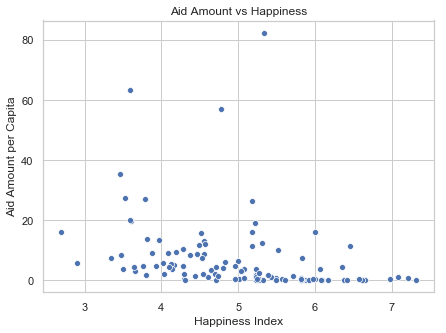

In [54]:
# Plot the attributes
plt.figure(figsize=(7, 5))
op = sns.scatterplot(x="Happiness Index", y="Aid Amount per Capita", data=aid_indexes).set_title('Aid Amount vs Happiness')

Before we can perform a cluster analysis, we must standardise our data for the two categories. It is clear from the above scatterplot that the numeric values of each category are far apart. The Happiness Index score ranges between 0 and 10 while the amount of obligated aid per capita ranges from < 1 to 82.28. 

The high variance of the aid amount per capita (standard deviation = 12.48) means clusters will be more influenced by aid amount than the Happiness Index with its lower values and variance (standard deviation = 0.9930). 

To avoid these influences we will standardise the data, scaling it based on the mean variance. This provides a common distance threshold suitable to compare the two attributes across the distance-based algorithms we are using. 

To standardise, lets separate our attributes and then use the scikit preprocessing.scale() function to scale our data for clustering.

In [55]:
# Subset the data with the Happiness Index and Aid Amount attributes
happy_aid = aid_indexes[['Happiness Index','Aid Amount per Capita']]

# Scale the data
scaled = preprocessing.scale(happy_aid)

Now we have scaled data stored as a numpy array that we will feed into our clustering algorithms. We'll use scikit again to cluster the points, assess their fit with the silhoutte score, and then visualise and determine the best clustering method. 

### DBSCAN <a name="DBSCAN"></a>

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that builds clusters of points based on local proximity and when falling within a maximum distance threshold. An advantage of DBSCAN is that the user does not need to specify the number of clusters. However, it does require prior knowledge of the data in order to specify the two main parameters - Eps and MinPts. 

According to the scikit documentation of DBSCAN, Eps is the maximum distance between two samples for them to be considered in the same neighbourhood. MinPts is the number of samples in a neighbourhood for a point to be considered a core point. 

While it is difficult to identify the best parameters at the start, we will perform a parameter sweep to identify the best combination. 

First we will create our cluster object, fit the data, and attach the labels.


In [56]:
# Create the DBSCAN cluster object with some starting parameters
dbscan = DBSCAN(eps=0.3, min_samples=10) 

# Fit the cluster object to our scaled data.
dbscan.fit(scaled) 

# Attach the identified cluster labels
dbscan_labels = dbscan.labels_

# Print the silhouette score of this particular parameter
print("The silhouette score is: " + str(metrics.silhouette_score(scaled, dbscan_labels)))

The silhouette score is: 0.22585376699007706


Based on some initial parameters (Eps = 0.3 and MinPts = 10) the silhouette score is quite poor (0.23). We want a silhouette score as close to 1 as possible. We will perform a parameter sweep to identify what the best performing parameters are based on silhouette score. 

The for loop below will iterate through the different Eps and MinPts parameters and record the silhouette score for each. From this, we will print out what the best parameters are according to the highest silhouette score.


In [57]:
# Create a for loop to iterate through the different parameters and recording their silhoutte scores

eps = [0.2,0.3,0.5,0.7,0.9] 
min_sample = [1,3,5,7,10]
epslen, samplen = len(eps), len(min_sample)
score_frame = pd.DataFrame(columns=['Eps', 'MinPts', 'Silh Score'])

for i in range(epslen):
    for j in range(samplen):
        dbscan = DBSCAN(eps=eps[i], min_samples=min_sample[j]).fit(scaled)
        dbscan_labels = dbscan.labels_
        score_frame = score_frame.append({'Eps': eps[i], 'MinPts': min_sample[j], "Silh Score" : metrics.silhouette_score(scaled, dbscan_labels)}, ignore_index=True)
        
        
print(score_frame.loc[score_frame['Silh Score'].idxmax()])      

Eps                                             0.900
MinPts                                          3.000
Silh Score                                      0.720
Name: 21, dtype: float64


Based on our parameter sweep, we can see that the ideal parameters for this data is Eps = 0.9 and MinPts = 3. This gives us a silhoutte score of 0.72 - a great improvement from our initial 0.23 score. We will now re-run the DBSCAN clustering with these optimal parameters and view our results.

In [58]:
# Create the DBSCAN cluster object with the identified best paramaters
dbscan = DBSCAN(eps=0.9, min_samples=3) 

# Fit the cluster object to our scaled data.
dbscan.fit(scaled) 

# Attach the identified cluster labels
dbscan_labels = dbscan.labels_

# Add the cluster labels to our dataframe in a new column 'labels'
happy_aid['labels'] = dbscan_labels

# Print the silhoutte score of these best parameters and label count
print("The highest silhouette score is: " +  str(metrics.silhouette_score(scaled, dbscan_labels)))
print("And the cluster list is: ")
print(happy_aid['labels'].unique())


The highest silhouette score is: 0.7195606890591993
And the cluster list is: 
[ 0 -1]


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


The output above shows that the optimal DBSCAN parameters cluster the data into two groups.

Below, we can visualise these clusters.

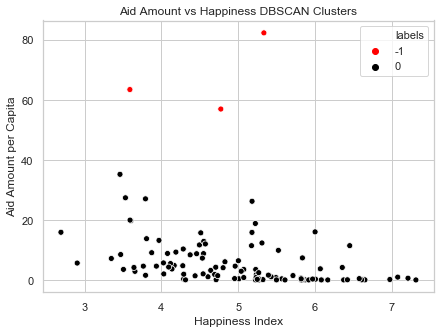

In [59]:
# Plot these DBSCAN clusters 
plt.figure(figsize=(7, 5))
op = sns.scatterplot(x="Happiness Index", y="Aid Amount per Capita", hue = "labels", palette="flag", data=happy_aid).set_title('Aid Amount vs Happiness DBSCAN Clusters')

We can see that the vast majority of points are in one cluster, while the second cluster is made up of, seemingly, data outliers. Cluster two (labelled as -1) appears to be characterised as countries with low-medium Happiness Index, but very high obligated amounts. 

When we re-attach the labels with the country names we can see which countries are in this cluster, below.

In [60]:
# Attach labels to the country list and show the countries that in cluster 2
happy_merge = happy_aid.merge(aid_indexes, how = 'inner', on = 'Aid Amount per Capita')

happy_merge = happy_merge[['Country','Happiness Index_x', 'Aid Amount per Capita','labels']]

happy_merge.loc[happy_merge['labels'] == -1]

,Country,Happiness Index_x,Aid Amount per Capita,labels
51,Jordan,5.336,82.284,-1
88,South Sudan,3.591,63.404,-1
104,Palestine,4.775,56.919,-1


It is an interesting group of countries - Jordan, South Sudan, and Palestine. They each receive a very high amount of aid per capita with Happiness Indexes around the mean (4.973).

Now that we have this understanding, we will perform a K-means clustering method and see how the results compare. 

### K-means <a name="Kmeans"></a>

K-means clustering is similar to DBSCAN in that it is proximity related. In K-means, cluster centroids are placed randomly within space and points are assigned to that cluster based on proximity to the centroid. After that step, the centroids are recalculated as the new cluster mean. The process continues until the centroids no longer change. The method is quite painless, intuitive, and easy to interpret.  

However, K-means clustering has its problems. The user must specify the number of clusters before running the algorithm (unlike DBSCAN) and it will place all points within a cluster, even if the data itself is unclustered. Uneven sized clusters also cause issues as the centroids may be pulled to the high density areas. 

Regardless of the issues, K-means will provide a nice comparison to our DBSCAN results. 

The main parameter we must stipulate for K-means is n_clusters - the number of clusters we want to create. This is very difficult to decide at first.  As before, we will run K-means with an initial n_clusters parameters before conducting a sweep to identify which performs the best.

In [61]:
# Perform k-means clustering, still with our scaled data
kmeans = KMeans(n_clusters=3).fit(scaled)
kmeans_labels = kmeans.labels_

print("The silhouette score is: " + str(metrics.silhouette_score(scaled, kmeans_labels)))


The silhouette score is: 0.4728817405219098


With an initial parameter of three clusters we produced a silhouette score of 0.47. This is actually a better score than our initial DBSCAN score, but we will do a parameter sweep to find the optimal number based on silhouette score. 

In [62]:
# As before, create a for loop to iterate through the different parameters and recording their silhoutte scores
n_clusters = [2,3,4,5,6,7,8,9,10]
clu_n = len(n_clusters)
score_frame = pd.DataFrame(columns=['Cluster #', 'Silh Score'])

for i in range(clu_n):
    kmeans = KMeans(n_clusters=n_clusters[i]).fit(scaled)
    kmeans_labels = kmeans.labels_
    score_frame = score_frame.append({'Cluster #': n_clusters[i], "Silh Score" : metrics.silhouette_score(scaled, kmeans_labels)}, ignore_index=True)
        
        
print(score_frame.loc[score_frame['Silh Score'].idxmax()])   

Cluster #                                       3.000
Silh Score                                      0.473
Name: 1, dtype: float64


It turns out that our first K-means cluster with three clusters had the highest silhouette score. K-means can also rely on the Elbow Method to identify the best number of clusters.

To find and visualise the Elbow Method, the code below was adopted from  Chih-Ling Hsu's blog (Hsu, 2018).   

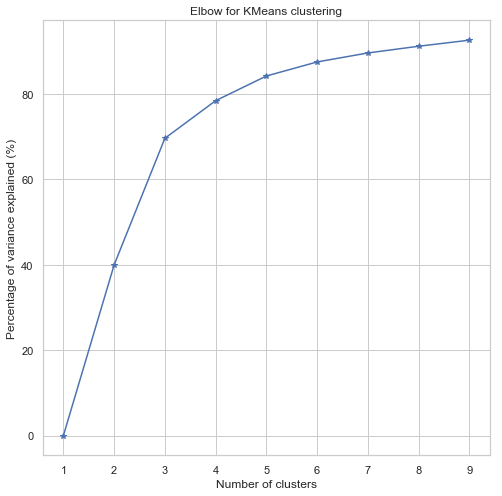

In [63]:
# Create Elbow Plot (code adapted from Chih-Ling Hsu)
from scipy.spatial.distance import cdist, pdist

Ks = range(1, 10)
kmean = [KMeans(n_clusters=i).fit(scaled) for i in Ks]

def plot_elbow(kmean, X):
    centroids = [k.cluster_centers_ for k in kmean]
    D_k = [cdist(scaled, center, 'euclidean') for center in centroids]
    dist = [np.min(D,axis=1) for D in D_k]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(scaled)**2)/scaled.shape[0]
    bss = tss-wcss

    plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    ax.plot(Ks, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained (%)')
    plt.title('Elbow for KMeans clustering')
    plt.show()

plot_elbow(kmean, scaled)

As we can see, the Elbow plot also confirms that three clusters is the ideal number while using the K-means clustering technique.

Now that we have confirmed the ideal number we will re-run the technique and save our labels.

In [64]:
# Create the K-means cluster object with the identified best paramaters and fit the scaled data
kmeans = KMeans(n_clusters=3).fit(scaled)

# Attach the identified cluster labels
kmeans_labels = kmeans.labels_

# Add the cluster labels to our dataframe in a new column 'labels'
happy_aid_kmean = aid_indexes[['Happiness Index','Aid Amount per Capita']]
happy_aid_kmean['labels'] = kmeans_labels

# Print the silhoutte score of these best parameters and label count
print("The highest silhoutte score is: " +  str(metrics.silhouette_score(scaled, kmeans_labels)))
print("And the cluster list is: ")
print(happy_aid_kmean['labels'].unique())

The highest silhoutte score is: 0.4728817405219098
And the cluster list is: 
[1 0 2]


C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


With the three clusters labelled we can visualise them on a scatter plot as we did with the DBSCAN results.

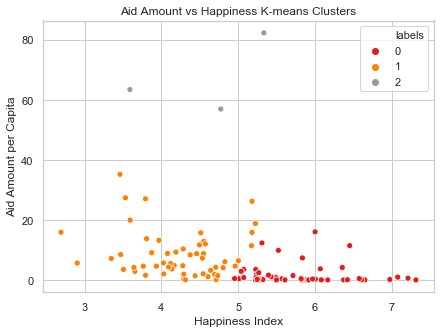

In [65]:
# Plot K-means clusters
plt.figure(figsize=(7, 5))
op = sns.scatterplot(x="Happiness Index", y="Aid Amount per Capita", hue = "labels", palette="Set1", data=happy_aid_kmean).set_title('Aid Amount vs Happiness K-means Clusters')

Visually, the K-means clustering makes sense. The three clusters could be loosely identified as (0) countries with low-medium Happiness Scores and high aid funding, (1) low-medium Happiness Scores and low-medium funding, and (2) countries with medium-high Happiness Scores and low funding. 

However, the silhouette score comparison shows that the DBSCAN clustering was a stronger algorithm. With a score of 0.72 versus the 0.47 score of K-means, we can conclude that DBCSCAN is the stronger clustering choice for this data based on the aid obligated per capita and Happiness Index. 


## Primary Analysis - Classification <a name="classification"></a>

To delve further into our analysis and attempt to answer our research question about USAID funding, we will conduct a classification analysis. Classification allows us to link the various indices we have with the amount of obligated aid that countries receive.

We will conduct three types of classification and compare their performance to identify the strongest method - (1) nearest neighbours, (2) support vector machines, and (3) random forests. Unfortunately, our classification is multi-dimensional which makes visualisation of the results difficult. However, we will use statistical validation measures (Precision, Recall, and F1) to gauge which classifier performs the best. These measures compare the predicted classes against actual, observed classes. 

To classify our data, first we must create the classes. 

Since we are interested in the amount of aid for countries, we will create classification labels for the amount of money obligated per capita. We will split the amount into three categories - Low, Medium, and High.

As these categories do not exist in our data, we must first create these labels in our dataset before moving into the individual classification methods. This approach is inspired by the classification technique that the World Bank conducts to classify countries into income groups based on gross national income per capita. 



In [66]:
# Create a new column of Aid Amount per Capita quantiles that we will use for classification
aid_indexes['Obligation Class'] = pd.qcut(aid_indexes['Aid Amount per Capita'], 3, ["Low", "Medium", "High"])

# Re-arrange the column order
aid_indexes = aid_indexes[['Country', 'Obligation Class',
 'Aid Amount',
 'Aid Amount per Capita',
 'Aid Category (Most Common)',
 'Aid Category (Highest $)',
 'Region',
 'Income Group',
 'Happiness Index',
 'Population density (per km2, 2017)',
 'Sex ratio (m per 100 f, 2017)',
 'GDP per capita (current US$)',
 'Economy: Agriculture (% of GVA)',
 'Economy: Industry (% of GVA)',
 'Economy: Services and other activity (% of GVA)',
 'Employment: Agriculture (% of employed)',
 'Employment: Industry (% of employed)',
 'Employment: Services (% of employed)',
 'Unemployment (% of labour force)',
 'International trade: Exports (million US$)',
 'International trade: Imports (million US$)',
 'Urban population (% of total population)',
 'Fertility rate, total (live births per woman)',
 'Infant mortality rate (per 1000 live births)',
 'Mobile-cellular subscriptions (per 100 inhabitants)',
 'Individuals using the Internet (per 100 inhabitants)',
 'CO2 emission estimates (million tons/tons per capita)',
 'Energy production, primary (Petajoules)',
 'Gini Coefficient',
 'Consumer Price Index',
 'FDI Inflows - GDP Percentage',
 'Gender Inequality Index',
 'Life Expectancy',
 'Avg Years of Schooling']]

# View this new category
aid_indexes[["Country", "Aid Amount", "Aid Amount per Capita", "Obligation Class"]].head()



C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,Aid Amount,Aid Amount per Capita,Obligation Class
0,Afghanistan,959612387,27.009,High
1,Albania,9345492,3.190,Medium
2,Algeria,981972,0.024,Low
3,Angola,46270179,1.554,Medium
4,Armenia,24501150,8.362,High


All countries now have a classification based on the amount of aid they receive per capita. 

We can visualise these classes with a few plots.

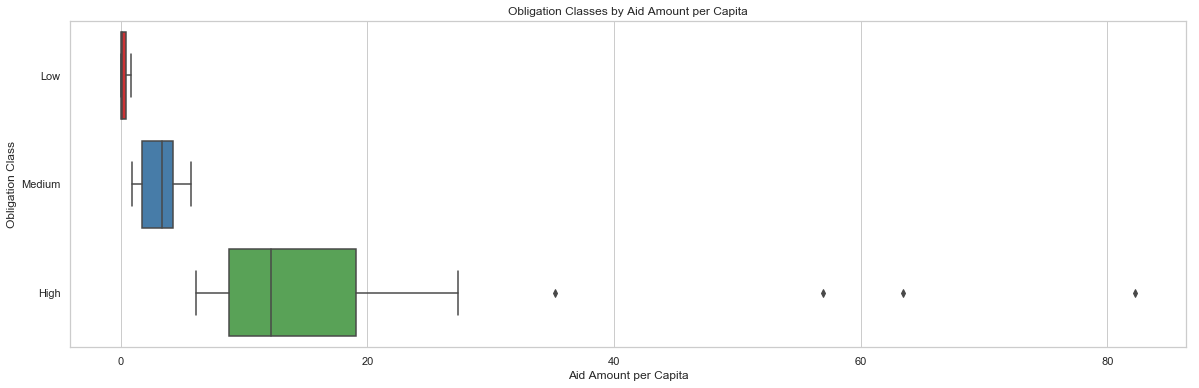

In [67]:
## Boxplot of classes
plt.figure(figsize=(20, 6))
sns.set(style="whitegrid")
ax = sns.boxplot(x="Aid Amount per Capita", y="Obligation Class", palette="Set1",data=aid_indexes).set_title('Obligation Classes by Aid Amount per Capita')

The above boxplot shows how each class is broken up by aid amount. An interesting observation is that the High obligation class has multiple, rather significant outliers. 

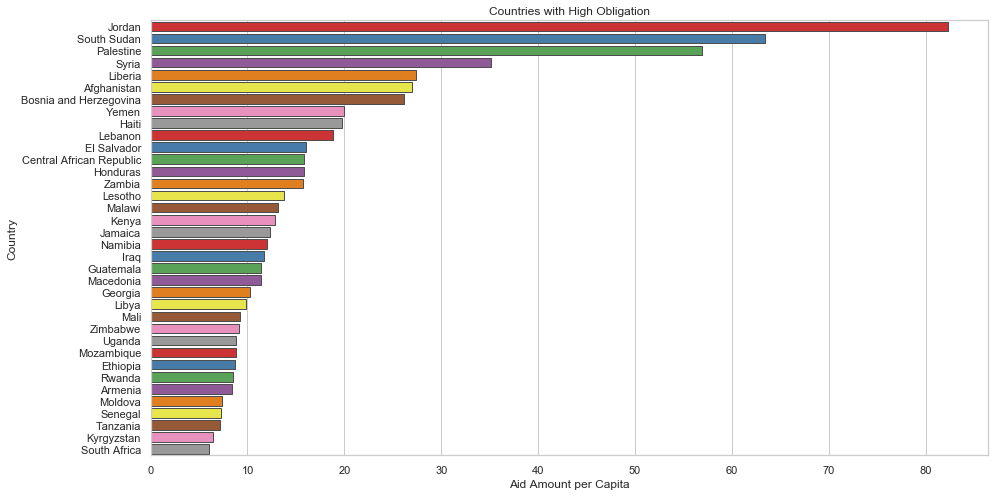

In [68]:
# High obligation countries
high = aid_indexes.loc[aid_indexes['Obligation Class'] == 'High'].sort_values(by=['Aid Amount per Capita'], ascending=False)
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
op = sns.barplot(x="Aid Amount per Capita", y="Country", palette="Set1", edgecolor=".3", data=high, ci=None).set_title('Countries with High Obligation')

The plot above shows the countries that are members of the High obligation class. The per capita amount ranges from \\$6.06 (South Africa) to \\$82.28 (Jordan) and has a mean of \\$18.18. We can see that the outliers from the boxplot are Jordan, South Sudan, Palestine, and Syria. 

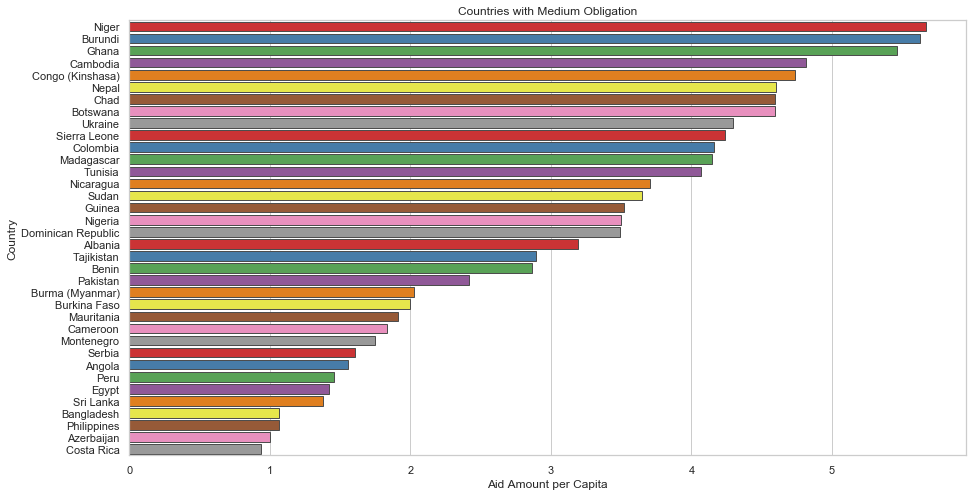

In [69]:
# Medium obligation countries
medium = aid_indexes.loc[aid_indexes['Obligation Class'] == 'Medium'].sort_values(by=['Aid Amount per Capita'], ascending=False)
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
op = sns.barplot(x="Aid Amount per Capita", y="Country", palette="Set1", edgecolor=".3", data=medium, ci=None).set_title('Countries with Medium Obligation')

The overall range of the Medium obligation class is much less than the High class. The Medium class ranges from \\$0.94 (Costa Rica) to \\$5.67 (Niger) with a mean obligation of \\$3.09.

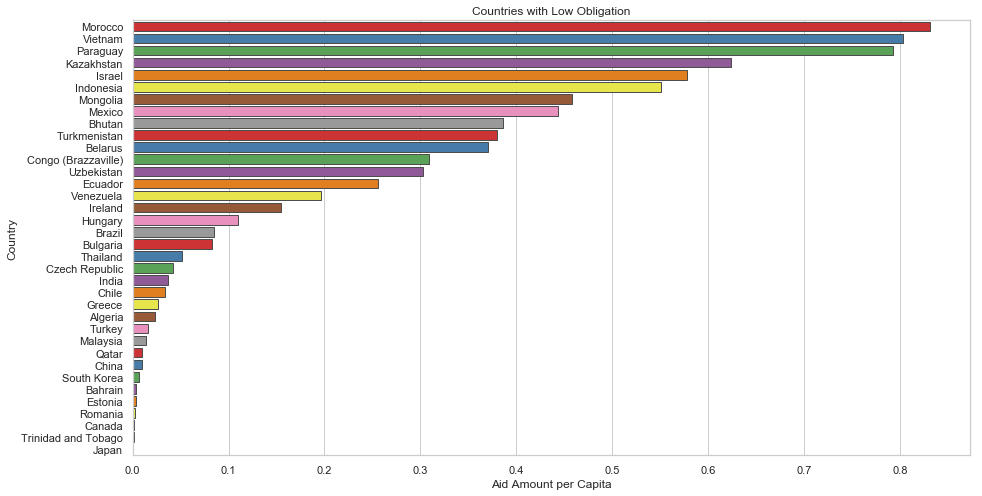

In [70]:
# Low obligation countries
low = aid_indexes.loc[aid_indexes['Obligation Class'] == 'Low'].sort_values(by=['Aid Amount per Capita'], ascending=False)
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
op = sns.barplot(x="Aid Amount per Capita", y="Country", palette="Set1", edgecolor=".3", data=low, ci=None).set_title('Countries with Low Obligation')

Finally, the countries in the Low obligation class range from \\$0 (Japan) to \\$0.83 (Morocco) with a mean of \\$0.22. Many of the very low values are developed countries (Canada, Japan, South Korea) which explains the low per capita amounts.

Now that we have our classifications of the amount of aid that is obligated per capita for countries we can split our dataset into two groups - one that contains our variable data and one containing our classifications. Both will be passed to our classifiers to find the relationships. 


In [71]:
# Split our datasets into attributes and labels
aid_label = aid_indexes[['Obligation Class']]
aid_attr = aid_indexes.drop(columns=["Obligation Class", "Country", "Aid Amount", "Aid Amount per Capita", "Region", "Income Group", "Aid Category (Most Common)", "Aid Category (Highest $)"] , axis = 1)


We now have two sets of data - our classification labels (aid_label) and our attribute data (aid_attr) that we will attempt to use to classify. 

However, before we move into the classification algorithms we want to perform some standardisation and feature selection. 

## Standardisation, Feature Selection, and Data Reorganisation <a name="PCA"></a>

To make our classification analysis more refined it is a best practice to conduct some feature selection. We have 27 columns of numeric, attribute data that we will use in our classification. However, not all attributes are helpful. Attributes with low variance may add noise to our models and impact how it performs. Therefore, it is a good idea to remove attributes that will not be useful. 

To do so, we will perform a Principal Components Analysis (PCA) of our attributes to identify the most important components. PCA reduces the complexity of datasets by combining attributes into the most important elements. These combined attributes capture much of the variance within the dataset and reduces the impact of less useful attributes. The main downside to PCA is that it produces components that are very difficult to interpret because the created components are dimensions of the data that maximise variance, but do not explicitly correspond with any of our initial categories. 

To prepare our data for PCA, we must first standardise our attributes. Just like clustering, we must be able to compare our attributes of different scales and values. As before, we will standardise our attribute data with Z-score scaling. This method establishes the difference from the mean of each category and then scales by standard deviation. This method is particularly useful when there are outliers in the data, which we know exist from our clustering analysis and boxplot.



In [72]:
# Standardise the attribute data with z-scores 
at_scaled = (aid_attr - aid_attr.mean()) / aid_attr.std()
at_scaled.head()

,Happiness Index,"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),International trade: Exports (million US$),International trade: Imports (million US$),Urban population (% of total population),"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births),Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Gini Coefficient,Consumer Price Index,FDI Inflows - GDP Percentage,Gender Inequality Index,Life Expectancy,Avg Years of Schooling
0,-1.188,-0.384,0.257,-0.538,0.696,-0.690,-0.099,1.238,-1.022,-1.123,0.001,-0.281,-0.325,-1.221,1.408,1.495,-1.191,-0.626,-0.269,-0.554,-1.325,0.172,-0.652,1.675,-1.046,-1.335
1,-0.332,-0.175,0.047,-0.238,0.622,-0.441,-0.237,0.371,-0.116,-0.439,1.115,-0.279,-0.319,0.211,-0.961,-0.730,0.100,-0.389,-0.267,-0.278,-1.193,-0.619,0.809,-1.257,1.086,0.626
2,0.905,-0.532,0.052,-0.223,-0.216,0.601,-0.340,-0.943,1.653,0.395,0.434,-0.154,-0.080,0.831,-0.105,-0.191,0.290,-0.376,0.294,-0.108,-0.059,-0.218,-0.573,-0.052,0.718,0.091
3,-1.187,-0.506,-0.224,-0.173,-0.659,1.883,-1.073,-1.226,1.991,0.598,-0.309,-0.194,-0.296,-0.409,1.868,1.363,-1.214,-0.346,0.101,-0.376,0.384,0.533,-1.589,-0.087,-2.039,-0.848
4,-0.602,-0.191,-0.577,-0.282,0.343,-0.229,-0.142,0.096,-0.400,0.082,1.239,-0.280,-0.327,0.458,-1.027,-0.788,0.353,-0.432,-0.271,-0.189,-1.039,-0.248,-0.147,-0.640,0.706,1.152


We can see above that the attribute dataset is now scaled. We will pass this scaled data into our PCA.

In [73]:
# Pull just the values from the scaled attribute dataframe
at_mat = at_scaled.values

In [74]:
# Create the PCA object
pca = PCA() 

# Run the PCA on our scaled values and return it as a numpy array
at_decomp = pca.fit_transform(at_mat) 

# Print the components 
print("The principal components of the attribure data, in descending order, are: \n" + str(pca.explained_variance_ratio_))

The principal components of the attribure data, in descending order, are: 
[3.68703702e-01 1.14541108e-01 9.53635662e-02 6.08332775e-02
 5.30263259e-02 4.75273656e-02 4.10227646e-02 3.26772833e-02
 2.96906986e-02 2.53994839e-02 2.26261467e-02 2.10632948e-02
 1.61376949e-02 1.40513107e-02 1.24534297e-02 1.04777772e-02
 8.79833403e-03 7.29992814e-03 5.17671708e-03 4.98433397e-03
 3.87610480e-03 2.67096997e-03 1.32483384e-03 2.55243679e-04
 1.82290348e-05 7.60220858e-08]


Looking at the results of the PCA reveal that 27 components were created with only the top several capturing the majority of the variance. We can see that the strongest component explains 37% of the variance, while the next several explain 11%, 10%, 6%, 5%, etc.

Deciding how many components to keep and bring into our analysis can be difficult and must be a judgement. We want to retain as much explanation as possible in the data, but also want to remove the impact of bad explanatory components. 

Since the PCA created 27 components we can keep a handful of these. We have decided to keep the top ten components, which explains a little over 85% of the variance. We will construct a for loop to create an array of the components we are keeping.

In [75]:
# Store the top 10 components in an array
at_decomp_final=[]
for i in range(len(at_decomp)):
    at_decomp_final.append(at_decomp[i][0:11])

Now that we have our components identified, we just need to transform our classification data ("Low", "Medium", "High") using the LabelEncoder tool from scikit. It will take our classification labels and transform it into the format that our classification methods require. 

In [76]:
# First, create the LabelEncoder object
le = LabelEncoder() 

# Run the encoder on our classifciation column
labels_fea = le.fit_transform(aid_indexes['Obligation Class']) 


With our classification labels transformed and components selected, we just need to split our data into training and testing subsets. By doing this we will be able to measure the success of the different classification methods. The training data is used to train the model on the classes, while the test data is used to test the accuracy. This is a vital step in the data analysis process as it will test how our classifiers work with data it has yet to see and may suggest how the classifying model works in the future with new data.

We split our data by using the scikit train_test_split tool. The tool creates subsets for us by randomly splitting our attribute and class data intro training and testing sets. 

We will create a 80:20 split of our data. That means training the classification methods on 80% of our data and testing it on 20% of it. Further, we use the random_state function to ensure that the same sample is used for all our classifications and results.

In [77]:
# Split our data using the scikit tool
train_d, test_d, train_lab, test_lab = train_test_split(at_decomp_final, labels_fea, test_size=0.20, random_state = 1234)

# Check the sizes of our subsets
print("The number of countries in our attribute training set is: " + str(len(train_d)))
print("The number of countries in our attribute testing set is: " + str(len(test_d)))
print("The number of countries in our label training set is: " + str(len(train_lab)))
print("The number of countries in our label testing set is: " + str(len(test_lab)))

The number of countries in our attribute training set is: 86
The number of countries in our attribute testing set is: 22
The number of countries in our label training set is: 86
The number of countries in our label testing set is: 22


We can see that our data is now split into training (86 countries) and testing (22 countries) subsets. We are ready to move forward with our classification methods. 

### Nearest Neighbors (k-NN) <a name="kNN"></a>

Nearest neighbours (also known as k-NN) classification considers neighbouring points and their classifications. Test points are classified according to proximity to points seen during the method training. Classification is computed from a majority vote of the nearest neighbours of each point and is then assigned to the majority class. 

k-NN is easy to implement and easy to understand. However, it is prone to overfitting and may be sensitive to local data patterns. 

The method is very similar to the k-means clustering method. The main hyperparameter of k-NN classification is the number of neighbours - n_neighbors. As we did in our clustering techniques, we will perform a parameter sweep to identify the optimal number of neighbours to use. 

Unlike our clustering techniques, scikit contains an incredibly useful parameter sweep tool called GridSearchCV that can be used to test various classification parameters. It outputs the best parameter settings based on cross-validation - a vital model refinement tool to judge the measure of fit. Cross validation executes model training and validation on multiple subsets of the data to evaluate the ability to predict new data that was not used in the training. This helps avoid the potential problems of overfitting or selection bias. 



In [78]:
# Setup our parameters for the k-NN grid search. As mentioned, the only hyperparameter we're interested in is n_neighbors.
parameters = {'n_neighbors': [1, 3, 4, 5, 6, 7, 8, 9, 10]}

# Perform the grid search for the k-NN classifer based on our n_neighbors parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, scoring='accuracy', return_train_score=True)

# Finally, run the grid search on our testing and training data
grid_search.fit(train_d, train_lab)

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(grid_search.best_params_))
result = pd.DataFrame(grid_search.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]


The best parameters identified are: {'n_neighbors': 5}


,mean_test_score,std_test_score,params
0,0.488,0.061,{'n_neighbors': 1}
1,0.523,0.023,{'n_neighbors': 3}
2,0.558,0.059,{'n_neighbors': 4}
3,0.581,0.071,{'n_neighbors': 5}
4,0.512,0.067,{'n_neighbors': 6}
5,0.535,0.064,{'n_neighbors': 7}
6,0.523,0.073,{'n_neighbors': 8}
7,0.547,0.066,{'n_neighbors': 9}
8,0.488,0.061,{'n_neighbors': 10}


We can see from our parameter sweep that the optimal n_neighbors value is five. 

GridSearchCV stores the optimal parameters and allows us to run the classifier with them. Next, we will run the k-NN classifer with this optimal parameter and look at the accuracy. 

In [79]:
# Use the optimal parameter setting to make predictions
predictions = grid_search.predict(test_d)

# Turn the predicted labels into our classification categories
predicted = pd.DataFrame(list(le.inverse_transform(predictions)))

# Turn our test labels into our classification categories
test_lab2 = pd.DataFrame(list(le.inverse_transform(test_lab)))


# Combine these the predicted and actual labels into a dataframe and rename the columns
aid_class = pd.concat([predicted, test_lab2], axis=1)
aid_class.columns = ['Predicted', 'Actual']

# Create a column in the dataframe that states if the classification was correct or not
aid_class['Match']=aid_class['Predicted']==aid_class['Actual']

aid_class.head(10)


C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Predicted,Actual,Match
0,High,High,True
1,High,High,True
2,Low,High,False
3,Medium,High,False
4,Low,Low,True
5,Low,Low,True
6,High,High,True
7,Low,Low,True
8,High,Medium,False
9,Low,High,False


The above dataframe shows how our classification labels compare with the actual, test labels. While this is helpful, we can visualise our results in a couple different ways.

First, we will produce a confusion matrix of the results.

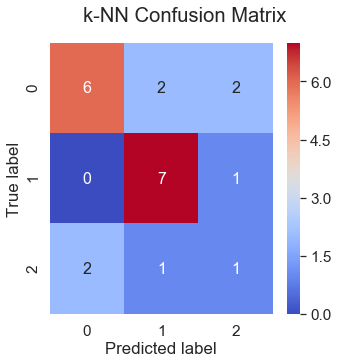

In [80]:
# Create the confusion matrix object
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

# Plot the confusion matrix
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, cmap="coolwarm")
plt.suptitle('k-NN Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The confusion matrix, with the colouring and number counts, quickly shows how the different categories were classified. The k-NN classifier appeared to have the most trouble predicting the countries with "Low" obligation amounts (category 2). 

We can get an even better sense of the results by viewing the classification report.

In [81]:
# Store the classification report results and print them out
def report_to_df(report):
    report = re.sub(r" +", " ", report).replace("avg / total", "avg/total").replace("\n ", "\n")
    report_df = pd.read_csv(StringIO("Classes" + report), sep=' ', index_col=0)        
    return(report_df)


report = metrics.classification_report(test_lab, predictions)
report_df = report_to_df(report)
report_df = report_df.reset_index()
report_df_knn = pd.melt(report_df, id_vars=['Classes'], value_vars=['precision', 'recall', 'f1-score'])
report_df_knn.rename(columns={'variable': 'Metric', 'value': 'Score'}, inplace=True)
report_df_knn['Classes'] = report_df_knn['Classes'].str.replace('0','High')
report_df_knn['Classes'] = report_df_knn['Classes'].str.replace('1','Medium')
report_df_knn['Classes'] = report_df_knn['Classes'].str.replace('2','Low')


print(metrics.classification_report(test_lab, predictions, target_names=['High', 'Medium', 'Low']))

             precision    recall  f1-score   support

       High       0.75      0.60      0.67        10
     Medium       0.70      0.88      0.78         8
        Low       0.25      0.25      0.25         4

avg / total       0.64      0.64      0.63        22



Based on the confusion matrix and the classification report, we can see that the k-NN was not a particularly strong classification method, especially with the "Low" class. It returned an average score around 64%, meaning it can only predict the correct obligation class 64% of the time.

### Support Vector Machine <a name="SVM"></a>

The second classification method we explore is the Support Vector Machine (SVM), or more specifically, Support Vector Classification (SVC). SVMs are a supervised learning method that works by finding a linear division between the class labels in the attribute space and attempts to maximise the distance between points and the classification line. 

Strengths of SVC include effectiveness in high dimensions, ease of implementation, and highly versatile in that many kernel functions can be used in the decision making. A disadvantage is that the kernel functions may be slow and it may be difficult to understand the inputs and outputs of the method. 

In our case, the hyperparameters we want to optimise are kernel, gamma, degree, and C values. 

* Kernel: The type of kernel to be used. We will test both 'rbf' and 'poly' kernels.
* Gamma: The kernel coefficient for rbf and poly kernels.
* Degree: Degree of the poly kernel function
* C: Penalty parameter of the function.
    
As before, we run a parameter sweep with GridSearchCV of these different SVC parameters to identify the strongest combination.



In [82]:
# Setup our parameters for the SVC grid search with the hyperparameters discussed above.
parameters = {'kernel': ['rbf', 'poly'], 'degree': [3,5,7], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 5, 10, 50, 100]}

# Perform the grid search for the SVC classifer based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
grid_search = GridSearchCV(SVC(), parameters, cv=5, scoring='accuracy', return_train_score=True)

# Finally, run the grid search on our testing and training data
grid_search.fit(train_d, train_lab)

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(grid_search.best_params_))
result = pd.DataFrame(grid_search.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'C': 50, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}


,mean_test_score,std_test_score,params
0,0.453,0.060,"{'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel'..."
1,0.372,0.012,"{'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel'..."
2,0.372,0.012,"{'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel..."
3,0.372,0.012,"{'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel..."
4,0.372,0.012,"{'C': 1, 'degree': 3, 'gamma': 1e-05, 'kernel'..."
5,0.372,0.012,"{'C': 1, 'degree': 3, 'gamma': 1e-05, 'kernel'..."
6,0.453,0.060,"{'C': 1, 'degree': 5, 'gamma': 0.001, 'kernel'..."
7,0.372,0.012,"{'C': 1, 'degree': 5, 'gamma': 0.001, 'kernel'..."
8,0.372,0.012,"{'C': 1, 'degree': 5, 'gamma': 0.0001, 'kernel..."
9,0.372,0.012,"{'C': 1, 'degree': 5, 'gamma': 0.0001, 'kernel..."


As we can see from our GridSearchCV dataframe, we had many more combinations of parameters to run for the SVC classification - 90 to be exact. This parameter sweep took slightly longer than our k-NN search. As before, we will make our SVC prediction based on the identified optimal parameters. 

In [83]:
# Use the optimal parameter setting to make predictions
predictions = grid_search.predict(test_d)

# Turn the predicted labels into our classification categories
predicted = pd.DataFrame(list(le.inverse_transform(predictions)))

# Turn our test labels into our classification categories
test_lab2 = pd.DataFrame(list(le.inverse_transform(test_lab)))


# Combine these the predicted and actual labels into a dataframe and rename the columns
aid_class = pd.concat([predicted, test_lab2], axis=1)
aid_class.columns = ['Predicted', 'Actual']

# Create a column in the dataframe that states if the classification was correct or not
aid_class['Match']=aid_class['Predicted']==aid_class['Actual']

aid_class.head(10)

C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Predicted,Actual,Match
0,Medium,High,False
1,High,High,True
2,Low,High,False
3,Medium,High,False
4,Low,Low,True
5,Low,Low,True
6,High,High,True
7,Low,Low,True
8,Medium,Medium,True
9,Medium,High,False


A quick viewing of the dataframe indicates that SVC might be a stronger classifier than k-NN. As before, we will look at the confusion matrix and classification report. 

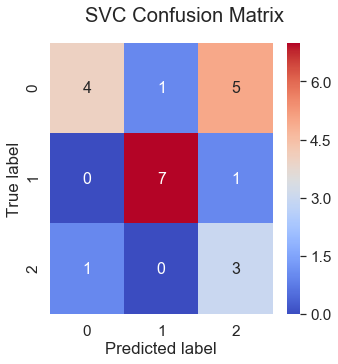

In [84]:
# Create the confusion matrix object
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

# Plot the confusion matrix
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, cmap="coolwarm")
plt.suptitle('SVC Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Similar to the k-NN classifier, SVC had issues predicting the countries with "High" obligation amounts (category 0).

In [85]:
# Store the classification report results and print them out
def report_to_df(report):
    report = re.sub(r" +", " ", report).replace("avg / total", "avg/total").replace("\n ", "\n")
    report_df = pd.read_csv(StringIO("Classes" + report), sep=' ', index_col=0)        
    return(report_df)


report = metrics.classification_report(test_lab, predictions)
report_df = report_to_df(report)
report_df = report_df.reset_index()
report_df_svc = pd.melt(report_df, id_vars=['Classes'], value_vars=['precision', 'recall', 'f1-score'])
report_df_svc.rename(columns={'variable': 'Metric', 'value': 'Score'}, inplace=True)
report_df_svc['Classes'] = report_df_svc['Classes'].str.replace('0','High')
report_df_svc['Classes'] = report_df_svc['Classes'].str.replace('1','Medium')
report_df_svc['Classes'] = report_df_svc['Classes'].str.replace('2','Low')


print(metrics.classification_report(test_lab, predictions, target_names=['High', 'Medium', 'Low']))

             precision    recall  f1-score   support

       High       0.80      0.40      0.53        10
     Medium       0.88      0.88      0.88         8
        Low       0.33      0.75      0.46         4

avg / total       0.74      0.64      0.64        22



The classification report shows that SVC performed about the same as k-NN with an average score around 64%. While SVC had a stronger precision score, the recall and F1 perfomed the same as k-NN.

### Random Forest <a name="RF"></a>

The last classification technique we try is the Random Forest Classifier. Random Forests are an extension of the decision tree technique. It fits multiple decision trees classifiers on random subsets of the data which prevents tree overfitting. 

Unlike the k-NN and SVC classification techniques, Random Forest is invariant to feature scaling and does not require scaled data. It is also able to handle both numeric and categorical data - a strong attribute of the method. That said, scaled data is not a detriment and we will use our scaled data again on our Random Forest.

However, another advantage of Random Forest is the ability for it to handle many features of non-linear data. Random Forest already sorts strong and weak predictors into the decision making process. In fact, with the relatively low number of features in our dataset, reducing the features through PCA may negatively impact the performance of the Random Forest. Although PCA improved the performance for k-NN and SVC classification, we will not use it for our Random Forest classification.

For our Random Forest classification model we use the standardised z-score values we calculated previously.

First we will re-split our data since we are using all of the scaled features rather than just the selected PCA components.


In [86]:
# Split data using the scikit tool
train_d2, test_d2, train_lab2, test_lab2 = train_test_split(at_mat, labels_fea, test_size=0.20, random_state = 1234)

Now, as before, we will use a parameter sweep to find our optimal Random Forest parameters. The main parameters we must decide are the number of trees to use in the forest (n_estimators) and the number of features to consider when deciding on the best split (max_features).

In [87]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest classifer based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='accuracy', return_train_score=True)

# Finally, run the grid search on our testing and training data
grid_search.fit(train_d2, train_lab2)

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(grid_search.best_params_))
result = pd.DataFrame(grid_search.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 500}


,mean_test_score,std_test_score,params
0,0.593,0.118,"{'max_features': 'sqrt', 'n_estimators': 50}"
1,0.640,0.069,"{'max_features': 'sqrt', 'n_estimators': 100}"
2,0.581,0.110,"{'max_features': 'sqrt', 'n_estimators': 150}"
3,0.605,0.117,"{'max_features': 'sqrt', 'n_estimators': 200}"
4,0.605,0.111,"{'max_features': 'sqrt', 'n_estimators': 250}"
5,0.593,0.102,"{'max_features': 'sqrt', 'n_estimators': 300}"
6,0.628,0.103,"{'max_features': 'sqrt', 'n_estimators': 350}"
7,0.605,0.143,"{'max_features': 'sqrt', 'n_estimators': 400}"
8,0.628,0.113,"{'max_features': 'sqrt', 'n_estimators': 450}"
9,0.651,0.124,"{'max_features': 'sqrt', 'n_estimators': 500}"


Although our parameter sweep had 68 less combinations than the SVC, the sweep took significantly longer. This could be problematic for particularly large datasets. 

With our ideal parameters identified, we can run our classification.

In [88]:
# Use the optimal parameter setting to make predictions
predictions = grid_search.predict(test_d2)

# Turn the predicted labels into our classification categories
predicted = pd.DataFrame(list(le.inverse_transform(predictions)))

# Turn our test labels into our classification categories
test_lab3 = pd.DataFrame(list(le.inverse_transform(test_lab2)))

# Combine these the predicted and actual labels into a dataframe and rename the columns
aid_class = pd.concat([predicted, test_lab3], axis=1)
aid_class.columns = ['Predicted', 'Actual']

# Create a column in the dataframe that states if the classification was correct or not
aid_class['Match']=aid_class['Predicted']==aid_class['Actual']

aid_class.head(10)

C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Predicted,Actual,Match
0,Medium,High,False
1,High,High,True
2,Low,High,False
3,Medium,High,False
4,Low,Low,True
5,Low,Low,True
6,High,High,True
7,Low,Low,True
8,High,Medium,False
9,High,High,True


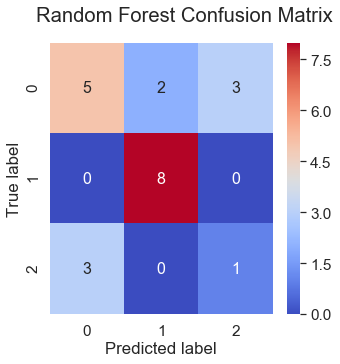

In [89]:
# Create the confusion matrix object
confusion_matrix = metrics.confusion_matrix(test_lab2, predictions)

# Plot the confusion matrix
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, cmap="coolwarm")
plt.suptitle('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [90]:
# Store the classification report results and print them out
def report_to_df(report):
    report = re.sub(r" +", " ", report).replace("avg / total", "avg/total").replace("\n ", "\n")
    report_df = pd.read_csv(StringIO("Classes" + report), sep=' ', index_col=0)        
    return(report_df)


report = metrics.classification_report(test_lab2, predictions)
report_df = report_to_df(report)
report_df = report_df.reset_index()
report_df_rf = pd.melt(report_df, id_vars=['Classes'], value_vars=['precision', 'recall', 'f1-score'])
report_df_rf.rename(columns={'variable': 'Metric', 'value': 'Score'}, inplace=True)
report_df_rf['Classes'] = report_df_rf['Classes'].str.replace('0','High')
report_df_rf['Classes'] = report_df_rf['Classes'].str.replace('1','Medium')
report_df_rf['Classes'] = report_df_rf['Classes'].str.replace('2','Low')


print(metrics.classification_report(test_lab2, predictions, target_names=['High', 'Medium', 'Low']))

             precision    recall  f1-score   support

       High       0.62      0.50      0.56        10
     Medium       0.80      1.00      0.89         8
        Low       0.25      0.25      0.25         4

avg / total       0.62      0.64      0.62        22



Viewing our confusion matrix and classification report for the Random Forest classifier shows that it performed slightly better than k-NN and SVC. With an average score around 68%, we can conclude that it is the strongest performer of the classifiers we used. Although, random forest also struggled with the "Low" class classification. 

Another unique advantage of the random forest is the ability to identify feature importance in the decision making.

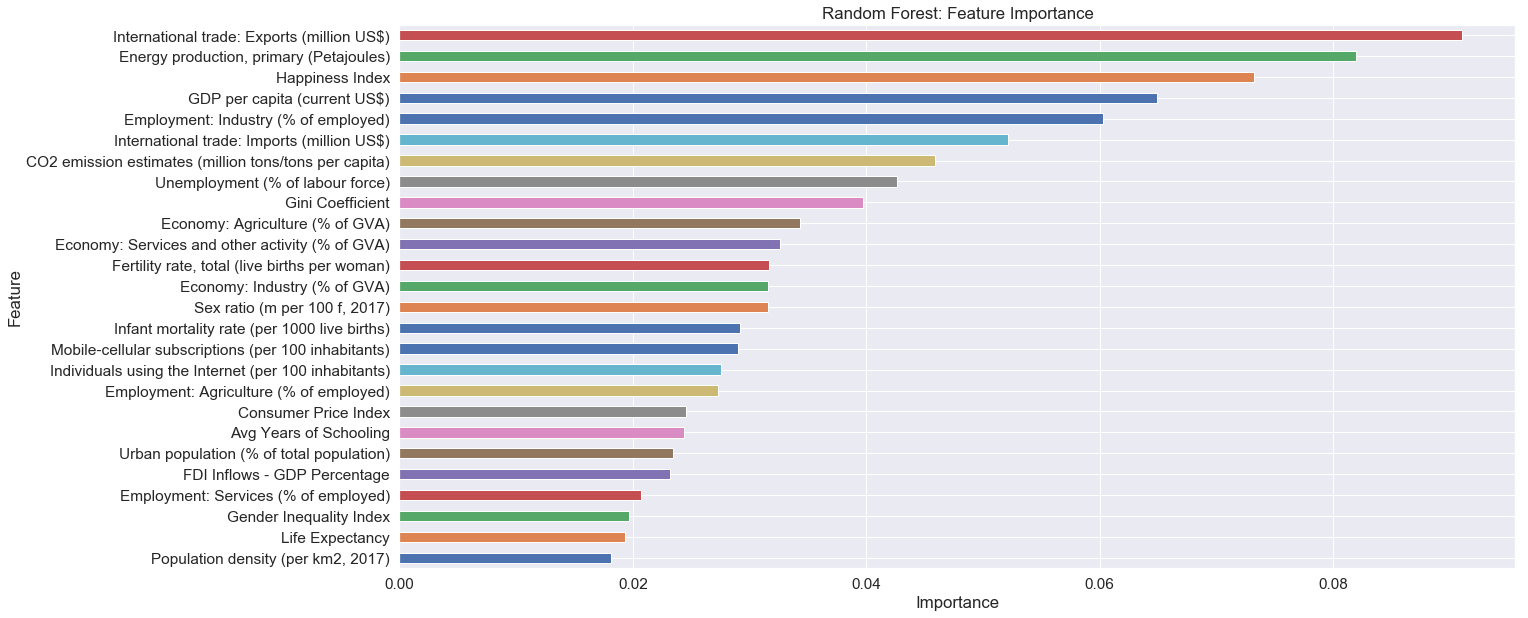

In [91]:
# Plot feature importances
fig, ax = plt.subplots(figsize=(20, 10))
feat_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=at_scaled.columns)

feat_importances= feat_importances.sort_values(ascending=True)

feat_importances.plot(kind='barh')
plt.title('Random Forest: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The categories of energy production and trade proved to be the most important in the classification process. Interestingly the Happiness Index was the third most important feature. The top features are mostly economic indicators, but it is an intriguing mixture of variables.

## Results and Conclusions <a name="results"></a>

While we explored many of aspects of our data, the goal of our research was to identify if the amount of USAID foreign assistance received by countries was related to their development indicators. We attempted to answer this question through classification analysis. We created categories of aid obligation per capita - Low, Medium, and High - and trained multiple classification models to predict the categories using the country's development indicators. 

A review of the classification results allow us to answer our research question.

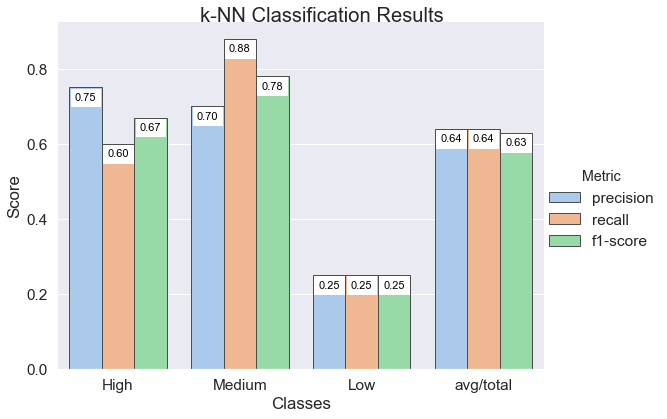

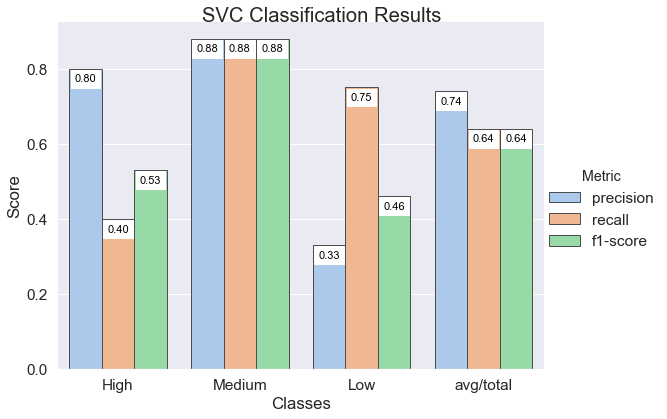

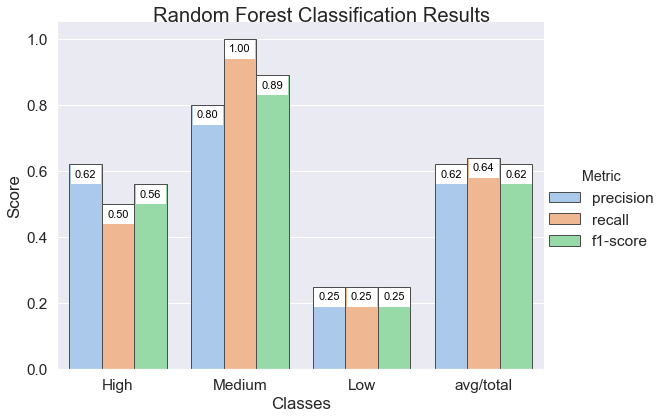

In [92]:
# Plot our classification results for each method - k-NN, SVC, and Random Forest

# Plot the k-NN results
a = sns.catplot(x='Classes', y='Score', hue='Metric', data=report_df_knn, kind='bar', palette="pastel", edgecolor=".3", height=6, aspect=8/6)
op1 = a.fig.suptitle('k-NN Classification Results')

# Annotate bars of k-NN Plot
ax=a.ax 
def annotateBars(row, ax=ax): 
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, -10), backgroundcolor='white',
        textcoords='offset points') 
        
plot = report_df_knn.apply(annotateBars, ax=ax, axis=1)

########

# Plot the SVC results
b = sns.catplot(x='Classes', y='Score', hue='Metric', data=report_df_svc, kind='bar',  palette="pastel", edgecolor=".3", height=6, aspect=8/6)
op2 = b.fig.suptitle('SVC Classification Results')

# Annotate bars of SVC Plot
ax2=b.ax 
def annotateBars(row, ax=ax2): 
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, -10), backgroundcolor='white',
        textcoords='offset points') 
        
plot2 = report_df_svc.apply(annotateBars, ax=ax2, axis=1)

########

# Plot the RF results
c = sns.catplot(x='Classes', y='Score', hue='Metric', data=report_df_rf, kind='bar',  palette="pastel", edgecolor=".3", height=6, aspect=8/6)
op3 = c.fig.suptitle('Random Forest Classification Results')

# Annotate bars of RF Plot
ax3=c.ax 
def annotateBars(row, ax=ax3): 
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, -10), backgroundcolor='white',
        textcoords='offset points') 
        
plot3 = report_df_rf.apply(annotateBars, ax=ax3, axis=1)



A review of the classification metrics of our three models - k-NN, SVC, and Random Forest - suggests that we can marginally predict, or classify, the amount of aid received by countries based on their country indicators. 

As the overall accuracy score of our classifiers can be misleading, we will judge our models based on the precision, recall, and F1 metrics: 

* Precision: Calculates how many of the predicted classes are actually that class. A strong determination measure when False                  Positive costs are high.  
* Recall: Calculates how many of the true classes our model labels as the correct class. A strong determination measure when               False Negative costs are high.  
* F1: A measure that balances precision and recall results. It is particularly useful with uneven class distributions, which           our models had.

In our case, Random Forest mostly outperformed in all categories. The only exception is that the SVC model had a higher overall precision score, but only by 0.05. Random Forest did have the highest overall accuracy as well (68%). 

The SVC and k-NN model performed about the same, each with 64% accuracy. Each had the greatest difficulty with the "Low" and "High" obligation categories. Of the two, SVC had greater success predicting the "Medium" category.

Our Random Forest model was the strongest performer with 68% accuracy and the highest average recall and F1 scores. However, it also struggled predicting the "Low" class.

Thus, we can conclude that our Random Forest model was the strongest classifier. We can also be confident that our data was not overfit to the model because we used cross validation results to choose our best model. 

Our research question, if we can predict the amount of aid countries receive based on their country development profiles, cannot be answered definitively. Using our Random Forest model we can predict with 68% accuracy the aid obligation category that countries receive based on their development indicators. Perhaps our trouble in classification indicates that aid is obligated by foreign policy interests rather than development needs. However, the moderate success of our classification shows that development indicators certainly have an impact.


There are many possible extensions of this research. The data used, particularly the USAID and UN data, are extremely rich and similar investigations could be done using other aspects of those data sets. 

For example, further research could include:
* Additional model refinement, or feature selection, that could improve classification performance of these models.
* Performing similar predictions using regression models. Although the scoring would be different, regression provides an opportunity to make aid obligation predictions in terms of actual dollar value.
* The majority of the USAID projects fell into the "World" region category. A study focused on those projects could be insightful.
* USAID has foreign assistance records dating back to 1946. An analysis that looked at change over time could be a very interesting research topic. 


## References <a name="ref"></a>

FAE: Dashboard, 2019, n.d. URL https://explorer.usaid.gov/aid-dashboard.html.

Hattori, T., 2003. The moral politics of foreign aid. Review of International Studies 29. https://doi.org/10.1017/S0260210503002298

Heinrich, T., 2013. When is Foreign Aid Selfish, When is it Selfless? The Journal of Politics 75, 422–435. https://doi.org/10.1017/S002238161300011X

Hoppen, J., 65 World Indexes, n.d. URL https://kaggle.com/joniarroba/65-world-indexes-gathered.

Hsu, C.-L., n.d. Clustering on New York City Bike Dataset. An Explorer of Things. URL https://chih-ling-hsu.github.io/2018/01/02/clustering-python.

McKinlay, R.D., Little, R., 1977. A Foreign Policy Model of U.S. Bilateral Aid Allocation. World Politics 30, 58–86. https://doi.org/10.2307/2010075

Fantom, N., Serajuddin, U., 2016. The World Bank’s Classification of Countries by Income, Policy Research Working Papers. The World Bank. https://doi.org/10.1596/1813-9450-7528

WHR, 2019, Read the Reports, n.d. URL http://worldhappiness.report/.

UNdata, n.d. URL http://data.un.org/.

USAID, U.S. Agency for International Development, 2018. URL https://www.usaid.gov/who-we-are/usaid-history.
